# Toymodel
## Johannes Holst
### March 2021

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
import math
import pandas as pd

print('Libraries have been imported')

def gaussian(x, y, mux, muy, sigma):
    if np.sqrt((x - mux)**2 + (y - muy)**2) > 3 * sigma:
        return 0.
    else:
        return (1 / (2 * np.pi * sigma**2)) * np.e**((-(x - mux)**2 - (y - muy)**2) / (2 * sigma**2))

def overlap(x, y, b):
    if x < b / 2:
        return (1 / (1 - math.erf(b / (2**(3/2) * sigma1)))) * gaussian(x, y, b, 0, sigma1)
    else:
        return (1 / (1 - math.erf(b / (2**(3/2) * sigma1)))) * gaussian(x, y, 0, 0, sigma1)

def convolution(x, y, b):
    return gaussian(x, y, b, 0, np.sqrt(2) * sigma1)

def product(x, y, b):
    return gaussian(x, y, b/2, 0, sigma1 / np.sqrt(2))

print('Probability distributions have been defined')

NMPIdata = pd.read_csv('mpi.dat', delimiter = '	')
NCHdata = pd.read_csv('ch.dat', delimiter = '	')
NHdata = pd.read_csv('h.dat', delimiter = '	')

LHCdata = [[5.016525023561197, 0.023529411764705868],
          [7.023135033005673, 0.0303921568627451],
          [9.737960339901136, 0.03496732026143791],
          [14.105288007515583, 0.041503267973856214],
          [19.53493862130652, 0.04084967320261439],
          [21.54154863075099, 0.04215686274509804],
          [23.666194523103965, 0.04215686274509804]]

xexp = [i[0] for i in LHCdata]
yexp = [i[1] for i in LHCdata]

print('Data has been loaded')

Libraries have been imported
Probability distributions have been defined
Data has been loaded


In [2]:
print(overlap(0,0,2.0999999999999996))

NameError: name 'sigma1' is not defined

In [53]:
def model(x, y, b):                 
    return overlap(x, y, b)         #Choice of probability density function

print('Model has been chosen')

sigma1 = 0.7                        #Sigma of the proton gaussian

xn = 101                            #Number of values on the x-axis
xr = -5.04, 5.04                    #Range of values of the x-axis
yn = xn                             #Number of values on the y-axis
yr = xr                             #Range of values on the y-axis

bn = 100                          #Number of values for the impact parameter
br = 0, 3 * sigma1                  #Range of values for the impact parameter

en = 1000                          #Number of events for each value of the impact parameter

print('Parameters have been set')

Model has been chosen
Parameters have been set


In [54]:
def eccPart(xList, yList, n):
    # Participant ecccentricity n squared
    num1 = 0.
    num2 = 0.
    denom = 0.
    sumw = 0.
    for x, y in zip(xList, yList):
        # Transform to polar
        r = np.sqrt(x*x + y*y)
        phi = np.arctan2(y,x)
        num1 += r**2 * np.cos(n * phi)
        num2 += r**2 * np.sin(n * phi)
        denom += r**2
        sumw += 1
    return ((num1/sumw)**2 + (num2/sumw)**2) / (denom / sumw)**2

In [55]:
xl = np.linspace(xr[0], xr[1], xn)
yl = np.linspace(yr[0], yr[1], yn)
bl = np.linspace(br[0], br[1], bn)

eps2lo = []
eps3lo = []
sc23lo = []
sclo = []
dNlo = []
v2lo = []
Slo = []
xyl = []
nMPIl = []

for x in xl:
    for y in yl:
        xyl.append((x, y))

for b in bl:
    pl = [overlap(xyl[i][0], xyl[i][1], b) for i in range(xn * yn)]
    eps2pl = []
    eps3pl = []
    
    Spl = []
    
    for i in range(len(NMPIdata)):
        if NMPIdata['xhigh'][i] > b:
            if NMPIdata['xlow'][i] <= b:
                nMPI = int(round(NMPIdata['val'][i]))
                nMPIl.append(nMPI)
                break
            else:
                pass
        else:
            pass
        
    for j in range(en):
        draw = random.choices(xyl, weights = pl, k = nMPI)
        
        drawx = [i[0] for i in draw]
        drawy = [i[1] for i in draw]
        
        x0 = mean(drawx)
        y0 = mean(drawy)
        
        drawx = [x - x0 for x in drawx]
        drawy = [y - y0 for y in drawy]

        drawx2 = [(i[0] - x0)**2 for i in draw]
        drawy2 = [(i[1] - y0)**2 for i in draw]
        drawxy = [(i[0] - x0) * (i[1] - y0) for i in draw]
        
        sigmax2 = mean(drawx2) - mean(drawx)**2
        sigmay2 = mean(drawy2) - mean(drawy)**2
        sigmaxy = mean(drawxy) - mean(drawx) * mean(drawy)
 
        eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
        #eps2pl.append(eps2p)
        
        ee2 = eccPart(drawx, drawy, 2.)
        ee3 = eccPart(drawx, drawy, 3.)
        eps2pl.append(ee2)
        eps3pl.append(ee3)
        

        Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)
        Spl.append(Sp)
    
    S = mean(Spl)
    Slo.append(S)
    
    eps2p2l = eps2pl
    eps3p2l = eps3pl
    eps23p2l = [i*j for i,j in zip(eps2pl,eps3pl)]
    
    eps2 = np.sqrt(mean(eps2p2l))
    sc23 = (mean(eps23p2l) - mean(eps2p2l)*mean(eps3p2l)) / (mean(eps2p2l)*mean(eps3p2l))
    
    eps2lo.append(eps2)
    sc23lo.append(sc23)
    
    
    for i in range(len(NHdata)):
        if NHdata['xhigh'][i] > b:
            if NHdata['xlow'][i] <= b:
                v2lo.append((eps2 * 0.2) / (1 + 5.8 * S / NHdata['val'][i]))
                break
            else:
                pass
        else:
            pass
    
    for i in range(len(NCHdata)):
        if NCHdata['xhigh'][i] > b:
            if NCHdata['xlow'][i] <= b:
                dNlo.append(NCHdata['val'][i])
                break
            else:
                pass
        else:
            pass

print('All ' + str(bn * en) + ' events have been generated.')

<ipython-input-55-5b109a9d04e2>:66: RuntimeWarning: invalid value encountered in sqrt
  Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)
<ipython-input-55-5b109a9d04e2>:57: RuntimeWarning: invalid value encountered in double_scalars
  eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
<ipython-input-54-aadddc9ae46c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return ((num1/sumw)**2 + (num2/sumw)**2) / (denom / sumw)**2


All 100000 events have been generated.


In [56]:
xl = np.linspace(xr[0], xr[1], xn)
yl = np.linspace(yr[0], yr[1], yn)
bl = np.linspace(br[0], br[1], bn)

eps2lp = []
sc23lp = []
dNlp = []
v2lp = []
Slpwo = []
xyl = []
nMPIl = []

for x in xl:
    for y in yl:
        xyl.append((x, y))

for b in bl:
    pl = [product(xyl[i][0], xyl[i][1], b) for i in range(xn * yn)]
    eps2pl = []
    eps3pl = []

    Spl = []
    
    for i in range(len(NMPIdata)):
        if NMPIdata['xhigh'][i] > b:
            if NMPIdata['xlow'][i] <= b:
                nMPI = int(round(NMPIdata['val'][i]))
                nMPIl.append(nMPI)
                break
            else:
                pass
        else:
            pass
        
    for j in range(en):
        draw = random.choices(xyl, weights = pl, k = nMPI)
        
        drawx = [i[0] for i in draw]
        drawy = [i[1] for i in draw]
        
        x0 = mean(drawx)
        y0 = mean(drawy)
        
        drawx = [x - x0 for x in drawx]
        drawy = [y - y0 for y in drawy]

        drawx2 = [(i[0] - x0)**2 for i in draw]
        drawy2 = [(i[1] - y0)**2 for i in draw]
        drawxy = [(i[0] - x0) * (i[1] - y0) for i in draw]
        
        sigmax2 = mean(drawx2) - mean(drawx)**2
        sigmay2 = mean(drawy2) - mean(drawy)**2
        sigmaxy = mean(drawxy) - mean(drawx) * mean(drawy)
        
        eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
        #eps2pl.append(eps2p)
        
        ee2 = eccPart(drawx, drawy, 2.)
        ee3 = eccPart(drawx, drawy, 3.)
        eps2pl.append(ee2)
        eps3pl.append(ee3)
        

        Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)
        Spl.append(Sp)
    
    S = mean(Spl)
    Slpwo.append(S)
    
    eps2p2l = eps2pl
    eps3p2l =  eps3pl
    eps23p2l = [i*j for i,j in zip(eps2pl,eps3pl)]
    
    eps2 = np.sqrt(mean(eps2p2l))
    sc23 = (mean(eps23p2l) - mean(eps2p2l)*mean(eps3p2l)) / (mean(eps2p2l)*mean(eps3p2l))
    
    eps2lp.append(eps2)
    sc23lp.append(sc23)
    
    
    for i in range(len(NHdata)):
        if NHdata['xhigh'][i] > b:
            if NHdata['xlow'][i] <= b:
                v2lp.append((eps2 * 0.2) / (1 + 5.8 * S / NHdata['val'][i]))
                break
            else:
                pass
        else:
            pass
    
    for i in range(len(NCHdata)):
        if NCHdata['xhigh'][i] > b:
            if NCHdata['xlow'][i] <= b:
                dNlp.append(NCHdata['val'][i])
                break
            else:
                pass
        else:
            pass

print('All ' + str(bn * en) + ' events have been generated.')

<ipython-input-56-063b009638ff>:64: RuntimeWarning: invalid value encountered in sqrt
  Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)
<ipython-input-56-063b009638ff>:55: RuntimeWarning: invalid value encountered in double_scalars
  eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
<ipython-input-54-aadddc9ae46c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return ((num1/sumw)**2 + (num2/sumw)**2) / (denom / sumw)**2


All 100000 events have been generated.


In [57]:
xl = np.linspace(xr[0], xr[1], xn)
yl = np.linspace(yr[0], yr[1], yn)
bl = np.linspace(br[0], br[1], bn)

eps2lc = []
sc23lc = []
dNlc = []
v2lc = []
Slc = []
xyl = []
nMPIl = []

for x in xl:
    for y in yl:
        xyl.append((x, y))

for b in bl:
    pl = [convolution(xyl[i][0], xyl[i][1], b) for i in range(xn * yn)]
    eps2pl = []
    Spl = []
    
    for i in range(len(NMPIdata)):
        if NMPIdata['xhigh'][i] > b:
            if NMPIdata['xlow'][i] <= b:
                nMPI = int(round(NMPIdata['val'][i]))
                nMPIl.append(nMPI)
                break
            else:
                pass
        else:
            pass
        
    for j in range(en):
        draw = random.choices(xyl, weights = pl, k = nMPI)
        
        drawx = [i[0] for i in draw]
        drawy = [i[1] for i in draw]
        
        x0 = mean(drawx)
        y0 = mean(drawy)
        
        drawx = [x - x0 for x in drawx]
        drawy = [y - y0 for y in drawy]

        drawx2 = [(i[0] - x0)**2 for i in draw]
        drawy2 = [(i[1] - y0)**2 for i in draw]
        drawxy = [(i[0] - x0) * (i[1] - y0) for i in draw]
        
        sigmax2 = mean(drawx2) - mean(drawx)**2
        sigmay2 = mean(drawy2) - mean(drawy)**2
        sigmaxy = mean(drawxy) - mean(drawx) * mean(drawy)
        
        eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
        #eps2pl.append(eps2p)
        ee2 = eccPart(drawx, drawy, 2.)
        ee3 = eccPart(drawx, drawy, 3.)
        eps2pl.append(ee2)
        eps3pl.append(ee3)
        print(ee3)
        

        Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)
        Spl.append(Sp)
    
    S = mean(Spl)
    Slc.append(S)
    
    eps2p2l = eps2pl
    eps3p2l = eps3pl
    eps23p2l = [i*j for i,j in zip(eps2pl,eps3pl)]
    
    eps2 = np.sqrt(mean(eps2p2l))
    sc23 = (mean(eps23p2l) - mean(eps2p2l)*mean(eps3p2l)) / (mean(eps2p2l)*mean(eps3p2l))
    
    eps2lc.append(eps2)
    sc23lc.append(sc23)
    
    for i in range(len(NHdata)):
        if NHdata['xhigh'][i] > b:
            if NHdata['xlow'][i] <= b:
                v2lc.append((eps2 * 0.2) / (1 + 5.8 * S / NHdata['val'][i]))
                break
            else:
                pass
        else:
            pass
    
    for i in range(len(NCHdata)):
        if NCHdata['xhigh'][i] > b:
            if NCHdata['xlow'][i] <= b:
                dNlc.append(NCHdata['val'][i])
                break
            else:
                pass
        else:
            pass

print('All ' + str(bn * en) + ' events have been generated.')

0.08511822803348267
0.07887038130289996
0.04975417643512124
0.15135802958644204
0.34573474321002806
0.10238092456198938
0.09335157594617326
0.07589802099636683
0.054134920945708445
0.1166713266229401
0.4462431664557551
0.18219359343638294
0.1431644156813719
0.026766706612773045
0.015182118621791321
0.0049294864037337845
0.009543153181069363
0.12795479206341437
0.17980940586855776
0.21597234265358797
0.07395901502545846
0.04961435444260829
0.0876779452383192
0.21294533715613725
0.04643297725076513
0.514543513440592
0.19659593034973621
0.15568099087984635
0.11925412337258001
0.0018354170231497681
0.10118207470270565
0.07702717426843125
0.00031807138702158764
0.0030251887353751855
0.18646736353731452
0.020138232171603633
0.0333525514696999
0.254306027464173
0.05216338285244836
0.0338069051784096
0.06353377658978152
0.18498073752099622
0.05107369822684103
0.4059789933428255
0.2371651168661093
0.009784146020187207
0.1296880318132242
0.11403602243436274
0.15921021662974547
0.1533347564811090

0.1447438545738437
0.006781357848727203
0.12518279122017248
0.1141095578356551
0.05384684166745313
0.032323804839323685
0.04244480097116611
0.042599903816198714
0.10552492710412964
0.2660824103511115
0.19487266832115074
0.41251878559864685
0.0639867123084691
0.08228756407195809
0.12444225972548736
0.16781985175188385
0.11674202066882743
0.25012998366361877
0.024673771879857816
0.11696351032169222
0.2041793820145991
0.35806751943516885
0.07085371036221537
0.08315985997939208
0.3646604416178173
0.08804069079370916
0.22896521078043144
0.1270199678564126
0.04342009783975292
0.16342735193352914
0.33610031317051836
0.5787265186979248
0.018151838747559917
0.18973584319542147
0.3199937081080424
0.11863035988192284
0.12174941408703414
0.347361645696312
0.05879794834837773
0.1357996095968548
0.03439565883634835
0.08534512202671131
0.23490556782618172
0.008093681606068742
0.007895440592268141
0.009050184802539631
0.0023984893806387976
0.07725741073969575
0.026857544612914626
0.010071692843338838


0.1836915659676585
0.5393566794009347
0.056114158537898196
0.15692696711520626
0.17212218675691937
0.06659984644679875
0.16123207026185649
0.028878727002167395
0.11587299056364786
0.13785683467871374
0.02070440107251661
0.3487762729649082
0.5950511797773412
0.016683314923661353
0.16061188435711707
0.07306438221509544
0.11947934679637315
0.04319894910367761
0.08331013691897554
0.0014369231017426255
0.008854260697323167
0.0676453596005005
0.014337791317946656
0.0401359890526258
0.02251531838343756
0.3286562969450152
0.198330045198342
0.22275266252204512
0.030299223225091123
0.16344724557797097
0.2709195528347463
0.20495060927281086
0.017280891935112907
0.06632901029732105
0.03786138983800565
0.07897841132042234
0.040471910666335396
0.04757091343157336
0.18271193206511163
0.182297732916913
0.24576990992939063
0.09287706158912318
0.256149636738904
0.0009356581415685208
0.0020162724155780836
0.007299820874037378
0.17992947562632933
0.042317720218611986
0.5646559781638358
0.0363330869995184


0.02441094149082515
0.5359645333445555
0.0678203157385624
0.01950164134980559
0.1325415312742766
0.37498282448326675
0.21252695850436903
0.1760715864414644
0.31328079593103364
0.11190457684490426
0.026274092544095476
0.0743812534928284
0.1393697725201715
0.09849727911384325
0.04840895540020843
0.2172469858131961
0.08840794444334847
0.14073125239824774
0.02393851194215194
0.09850419368798806
0.05041144964724043
0.09295105544402411
0.08830147831109608
0.03764548688088427
0.05174065984082557
0.04851697519074942
0.06467423353298148
0.30712751755953893
0.2793316077784255
0.07456885171680298
0.07689589434117625
0.014659587658439601
0.061513441577282356
0.05184950648297021
0.23792525843648143
0.03036771398514738
0.050836416837132414
0.037158344286249846
0.13405350237027128
0.30855302739659746
0.12508755004554525
0.14800155644020885
0.0721667245774251
0.12845646804012706
0.16332114294184794
0.06621940230801089
0.015479358199551327
0.020805804436600774
0.03136282884176411
0.08728270991743098
0.

0.029148885100117688
0.036289572813499024
0.22114466896345103
0.12249254972947897
0.270862033036314
0.02055569269719369
0.02831738533694356
0.0396019895502999
0.010172613273801282
0.0008405017289051212
0.007187539152611661
0.030229572570156578
0.0541597968551703
0.1828533424802386
0.1065220992376673
0.0005641203899090308
0.2168001695322319
0.08369200654720055
0.12391824904246375
0.06916998890027146
0.08785463751457784
0.11228927393152187
0.009649726553373062
0.0006429019640362713
0.018236146086908853
0.04573998216577567
0.008006563775864329
0.13756085830284226
0.1693453920657525
0.18791094174940728
0.048038125113951044
0.01233227894008247
0.07056089169264629
0.11544384075227677
0.11834427367923743
0.021550764430961204
0.20161790681196523
0.04465749670337343
0.05050400187860135
0.01839486845867032
0.2020824487808605
0.014272168461995409
0.052446071940411364
0.1571349350588455
0.17520082775028575
0.08382363167952463
0.18419668276929194
0.0746582287342821
0.33446886357310274
0.04435843425

0.10289352303238357
0.012873495932182842
0.015250203605610482
0.04283759234139047
0.022993137906746564
0.012080453895872494
0.1684613149726604
0.22806489694742527
0.028603539723029845
0.032723342496491496
0.12554130368601177
0.050326492411445774
0.04654889771581588
0.04102823124394613
0.14551703160206197
0.0014121509804626573
0.008120237786111708
0.020479738434355806
0.03732783403583525
0.14153440060513095
0.12105335681769397
0.08796188186778736
0.18228464876983003
0.07865825371928449
0.07180632314215507
0.08733599535332319
0.13371716105185355
0.13299162074907203
0.03287014570998308
0.36869080022760725
0.03422753398345264
0.07195429904354296
0.034060391165680715
0.10559083970554078
0.03328831109257048
0.05544016206150506
0.03808066772378563
0.034613647051360934
0.03390464344107124
0.0024314722778114484
0.07197070209994484
0.04215476961779451
0.13435754214461235
0.32257463317270363
0.05232883698854774
0.00583450435005372
0.31552080567679053
0.12000541938711576
0.07843256263800134
0.1477

0.07202216184216385
0.050894651549194356
0.019060100559067154
0.1021296753648795
0.3130383013911087
0.19510283181236843
0.1291835508042206
0.126824541225367
0.1140202496894646
0.2623446849135986
0.029030059775141146
0.003487548289555977
0.08035846763170006
0.024128962984921943
0.04295719812124081
4.1402221537593596e-05
0.0993064148162563
0.11020398235349023
0.16047327928068364
0.16705059800392041
0.1980290166913844
0.03494553483235601
0.14917584652987181
0.16830796778100815
0.46755934277739136
0.1053746120479793
0.1260419963429387
0.08363234994201414
0.057223151978180516
0.22136956990142978
0.24628054031028562
0.06854856953327763
0.08428593231809099
0.09876872230244067
0.08375095570091681
0.013036559029012403
0.24022778409566806
0.11896592071288747
0.15506653770397114
0.025416676453663616
0.04375844486037588
0.1642997826620331
0.2168989334590578
0.19265880921821368
0.0033687726932417512
0.041876395105117745
0.055478916106920274
0.29142008998151664
0.02749384687270701
0.0471671476304258

0.2793944194965986
0.03640133107357531
0.03968782412061003
0.13362405572964056
0.18129052345468769
0.05564561718347308
0.11365622866226847
0.07061013436361471
0.1315184026105805
0.3379026537588379
0.026845771947135097
0.13643455570207336
0.07335159899989681
0.01698524479651249
0.28045937773706836
0.046844917849384944
0.4125431316032362
0.06421920441137742
0.02579873597554546
0.18942131200904566
0.07292533430502664
0.30041197413541776
0.0319155099708624
0.14177383564591567
0.10935626876913945
0.007565551031741452
0.2107865753964023
0.08580029221038635
0.09895009369247072
0.3274441576190772
0.26827867055429844
0.3864118991563316
0.023653854259541897
0.03142512047928949
0.06357206590034582
0.12304665609213744
0.050363619356315954
0.04521251070912928
0.013498172694788682
0.06401238694330837
0.15862977659157695
0.005110788683025124
0.11784984888683647
0.07323096740499069
0.14082218948131217
0.05373780538547806
0.1212678173918548
0.40404268075036026
0.05810326317877539
0.048285860838734825
0

0.06761452838668382
0.23494879509110647
0.008388864944316036
0.20967953860511637
0.11008567116705979
0.15248363732468315
0.1270637674692716
0.556796274820702
0.11629240165529202
0.04689996503870388
0.3335080733564617
0.004012814128562642
0.08093011071611106
0.043648858717126295
0.17725733883487263
0.05376746953423697
0.09687248467416436
0.11809618104210204
0.09776458055807448
0.5063109688446328
0.08349480372854058
0.05721336553265919
0.08200337810990624
0.004320138978680206
0.30482598943126965
0.02562339630127717
0.08442596464805119
0.02517213498198703
0.15757947421250051
0.1022625184384012
0.02621311144479551
0.30049123077593093
0.058468541223191124
0.00458749981261949
4.128728349303228e-05
0.043245544290920104
0.1921360103410017
0.05970249874392258
0.06235564042911905
0.012089282371227382
0.21375595121654928
0.0951312438305507
0.14243807617936824
0.1362441294984319
0.26769959455079656
0.14773228382121284
0.06283951658726897
0.30149643645836954
0.05663644803912265
0.2175043825366015
0

0.05889942523483621
0.07465445024137721
0.13058565386198928
0.11836563694919791
0.09221716758703385
0.07354067565634352
0.2890211309131284
0.25150283502261694
0.41293981270961033
0.053698636786725304
0.28874630658276945
0.16393673569134093
0.48591134298069383
0.023179286324596288
0.10355639412067064
0.2585980096784254
0.15687651350218518
0.149489585977042
0.14189820906077413
0.2642563156545669
0.13864680252426506
0.04461121799393007
0.004993453908475458
0.12130119737017821
0.06019243796438943
0.1614944964286167
0.13406461464604366
0.08981226591362748
0.00876615101262371
0.1789929076645895
0.4861262080467126
0.012088248160398631
0.1835686876751597
0.26322666562107466
0.034969098707141655
0.03812085264692569
0.02657051731829947
0.2540492084209708
0.0008648729493875394
0.07941226279241734
0.009945331310264005
0.25983414120936066
0.14196303500747423
0.05932043323324847
0.1704749056832089
0.18839620925714556
0.09988930042459933
0.15797517452234477
0.025298088582746694
0.03980530643553632
0.

0.07978464457389285
0.2577887666291313
0.19367194786738703
0.021507034550872623
0.03457477734082922
0.347508612946609
0.09842696032430474
0.026591095770582142
0.008884491611821456
0.09728212453829978
0.04506278732886729
0.3771477360527035
0.21019417998814421
0.18711650350455536
0.07342135243995417
0.15038376836988995
0.025267352759041174
0.02745634625690044
0.06125804250731616
0.014141388712931205
0.049217119796040244
0.09569187807816287
0.014335869003236877
0.007946805370358308
0.07574776869557877
0.415804426125141
0.1078258412346718
0.3929493840364983
0.20536827278974823
0.13214333497433747
0.11608610845312439
0.035382303344123484
0.16508038459876478
0.1891195245387742
0.3238114912382135
0.04663915826853853
0.02374651398034483
0.4247921128460175
0.16628876908493043
0.0901466421820557
0.42884995476954574
0.05497533619736028
0.047714841935834744
0.08159454167063317
0.12449394053732242
0.05601826752790655
0.009063825566082926
0.0899825875182691
0.270690625878092
0.052579715574411344
0.1

0.07774930785156815
0.38022814069745525
0.1940092675374121
0.08637286857865902
0.16950110496852927
0.1435982935236427
0.03946849498577771
0.013275866741524091
0.30270181834203497
0.07461163214006285
0.050362343754354624
0.22981404142113712
0.03093473669747792
0.036124399986690335
0.0856616598342174
0.2592102614813897
0.008673789732242523
0.14543332498197803
0.012923582484901528
0.02056044968185565
0.002222637455491454
0.02105546355257335
0.2501784329881268
0.05391228094282386
0.03998193856660761
0.0071604160074884
0.03495519843893238
0.14100523807237725
0.059055138498038146
0.22799043767078217
0.034547852621752945
0.12900157404767737
0.0022238231306056016
0.023998098536106037
0.0004112200006927858
0.03390934722398911
0.10301161851787667
0.48931826102292714
0.030852552617192476
0.23679433634273456
0.04767951214288946
0.1657542293851718
0.1341409038764714
0.017327566248899164
0.08358027590789721
0.3799996767211755
0.08272052861756958
0.02767440240282202
0.02376312166865915
0.054418692868

0.021884756636034484
0.012889293206111272
0.07884831500998275
0.18501889488840778
0.04813325239072156
0.17058239640421755
0.21656370855949486
0.20505936306387115
0.004168241836841312
0.17761557590718535
0.12631437866532672
0.20698732660538027
0.13225415226250656
0.03554945007249974
0.045115733238243014
0.28382332293106566
0.07400150202219387
0.09312209565240388
0.1778374910420332
0.09276648964105484
0.06462867915924855
0.05744421510961396
0.08173672973671255
0.21006316106779138
0.09589975945713904
0.08783834109178845
0.09309036075773978
0.1555621794489775
0.1600587811544052
0.01576326035581437
0.04823221483309173
0.01173556155774093
0.04672113096838902
0.291678666326329
0.07218596729797004
0.014959199480089665
0.07034968148237788
0.08959992454669634
0.0974897749594817
0.28385375201589247
0.37786731221048686
0.21685269867566398
0.2705607996553939
0.07540413987855596
0.23026108121537162
0.04933651150216967
0.09906499583399517
0.0362753896451219
0.003871513914083329
0.15432353337547447
0.

0.03503102401127884
0.007115034517997395
0.03753776544097419
0.07288495748452468
0.05579614382878835
0.09995790357925906
0.06905221349676968
0.06482554657789444
0.1001780763962083
0.11112396852696937
0.01710019612232183
0.150909110306742
0.021274233856838968
0.0033965644887156343
0.08536794263977175
0.2160006627858881
0.4490075803436478
0.3718290405840244
0.11686323495679503
0.07195771275218132
0.09413371063471715
0.05114511759395675
0.0648806653078096
0.2451533732015706
0.04548592598359567
0.2477298853815191
0.09971081496889465
0.03738541889610463
0.0021355619758140114
0.1327439871386529
0.04259288228716426
0.18985434193525014
0.023081902356681054
0.04703934572928415
0.17871339675392967
0.08000008922268564
0.009687308032347358
0.13213873936935713
0.10678925758219499
0.039851359508300356
0.2861089717093248
0.07690925851782462
0.05626705801757658
0.18996829460225195
0.1150491127130713
0.008488122600153275
0.11613337346057026
0.04614045856525151
0.021676992385172265
0.017241746523116917


0.01545210637285157
0.19302603885597938
0.10188985077061938
0.03199321635962224
0.010083702159253553
0.038904393060360004
0.0797766921959972
0.20792956885860583
0.013736642764145147
0.2506951765245749
0.19734067160941457
0.04080966079518863
0.04127352657429538
0.28954371379242516
0.026674156386179437
0.021500947703074216
0.03982151974396875
0.02698487112760365
0.0026166063116217705
0.05284285943975161
0.24285438731545061
0.004585141157150953
0.16258674972155138
0.023888680931217023
0.008365207195789754
0.05566094804391899
0.07364690392949562
0.2500838245462158
0.20923847349563932
0.20540083120195968
0.06917470260040139
0.21366115939725835
0.143081014000538
0.09588690566040381
0.12265740476575666
0.2362941619215544
0.05172706843602088
0.09640886305534464
0.04280030154311482
0.16644549147215554
0.17994218425586866
0.047411796021228546
0.11858824833290407
0.040893711067105945
0.13753697440705956
0.01051608415950498
0.08457891733047034
0.1015312839823916
0.0466183033403416
0.08114728612552

0.0007079976683219669
0.13232156052714641
0.032358294095462065
0.10958320380024172
0.018916488650685084
0.061251942877505995
0.3746467649675493
0.035943867966018006
0.04770499609374374
0.4602210475171301
0.0630039588655633
0.16560760954372314
0.03414845941675552
0.22762903604138116
0.1525107213675819
0.23584351216099184
0.08511711968200562
0.05531378976124425
0.3807299471020445
0.06763087295385682
0.07395077424723537
0.01162232780316978
0.26363521762348585
0.01635177358737073
0.10099696936737926
0.0961543041262004
0.3812629790253038
0.19121887063038864
0.047038411187613136
0.048390758216004144
0.05943890829290841
0.02223026261592417
0.05509216231225966
0.026577701014641627
0.07509454724133328
0.0644118871573646
0.10155433509389088
0.16718537530287933
0.10969195435289601
0.06124456188057766
0.016018842930208384
0.010513446157848386
0.02141793660645282
0.03602483188106871
0.02142105138378019
0.0325274647247612
0.0012248487493036508
0.47037713717274493
0.027245456437728653
0.2473266170661

0.018644428934777697
0.10551869920400246
0.12456143088431038
0.06732345338172932
0.028112648367093356
0.07204006594847967
0.03706535675087508
0.3402636069151145
0.12087888191742649
0.06447822027719138
0.03882504767284447
0.0884813627027318
0.14908461691553698
0.06667350052123357
0.07788303224867887
0.08559893780614652
0.44198021156450873
0.013425716837737054
0.22314527323776903
0.03273455568319533
0.012590522003436005
0.2850249000777732
0.0691693447572377
0.04747983593713368
0.01544080720412502
0.0949104635010298
0.10666092969233401
0.12428737253755356
0.041589277428656236
0.4044617742400237
0.05800847545933075
0.09624801293965622
0.3179044803673267
0.002428958771053054
0.2795874671295357
0.17579723162215022
0.02413411257464298
0.06604000827896261
0.16900523960827096
0.04425834433917509
0.31833301964446314
0.256695477549312
0.5295377465661035
0.007591238435242206
0.056554556578478986
0.08828619370948076
0.21237533007888526
0.22879933348766732
0.05599448707590892
0.03985125614284541
0.0

0.054798557812748554
0.3637420569316918
0.018531331366880302
0.06939218133060895
0.20902605222270207
0.18274470484011993
0.10830876443347393
0.04933917872856361
0.15086237931184263
0.03510611819521784
0.07101295222809292
0.0898463266413818
0.06807901758151577
0.04186561379176478
0.174001688638009
0.07868488480927271
0.10874091183935493
0.2961336799674579
0.09966068847612541
0.03149933584290196
0.25383657801505777
0.11018295195832352
0.06630874192981048
0.08766728993400348
0.11179423561540988
0.0707584406744297
0.02904228343579696
0.17569247478522948
0.031726808423305844
0.014790743876956976
0.30059321117553117
0.3686969787517161
0.24704367944021147
0.13841857481167988
0.03859343549962921
0.1457169051582907
0.07492174254863877
0.06607737437150012
0.06629618144567215
0.16073227475046992
0.00023194619932221462
0.28534509529733226
0.06510939247927684
0.23466204556122933
0.16200871022625468
0.06078358592995419
0.00835688467547435
0.058919410826311115
0.054454238100616746
0.12894590864955172

0.08306479029107582
0.056024326322097806
0.11384107296159006
0.05948136102830782
0.039333651727240744
0.05368065270598193
0.10202273791350125
0.07339415016960388
0.01763894739629237
0.039587963600912705
0.0707050397106381
0.06367996161936756
0.13757962381372787
0.2964629466234603
0.20268945460543156
0.2212220834383871
0.044955433974302454
0.14756140518566366
0.11111722524837848
0.09616899039326386
0.18571995674568795
0.04770081509716999
0.004316759370375958
0.05839115897902593
0.03839101488898746
0.07739470523142823
0.10574835124430348
0.05542576160519425
0.05861839188990394
0.025483392371751575
0.20494269291136755
0.15197613952985706
0.21614819974018476
0.24907152708041785
0.20417560985229025
0.2568811303989163
0.06664207651463681
0.127765424278475
0.03346095755686675
0.04450851066301642
0.07116817238874863
0.12006989777546435
0.08219020745699351
0.19059182765121666
0.13920639623343634
0.17333533616374927
0.008236967510579587
0.013554797552874512
0.08539004497224578
0.2897282944757146

0.1714658053923766
0.19333149097359975
0.03156996599279237
0.2536785648988369
0.49081130150035884
0.0015436752174200921
0.07210543331403753
0.13290482241085366
0.00017465481880115722
0.34633352565206127
0.006234273870936904
0.0959779872896158
0.04206699838054816
0.023855682701892308
0.13013596324265536
0.04177920483707818
0.16979972947255018
0.2092432530074118
0.035308775764654556
0.00285810011423618
0.11598878328172359
0.26014569898865253
0.15903254191792524
0.10070650779492427
0.01953747202445519
0.16131712799025313
0.11405781194585675
0.15960142452227835
0.09636359369928844
0.26903606047228035
0.11167492788023571
0.22122329518010558
0.04535489761597325
0.18545539937318226
0.25233662632363635
0.08339473218887543
0.30135747162286697
0.10152131423302571
0.06436296652931486
0.14143412746394485
0.19397046670826848
0.08190423681416745
0.26276369774986685
0.33573107472835323
0.3787511341579344
0.09679993931623922
0.15969554182404097
0.019348372967320098
0.006132666788173444
0.2991993026204

0.07517921493926746
0.17519275053638964
0.038162216092821596
0.05798749241980639
0.04022547318739958
0.05281830903306241
0.4263137773035346
0.1861383474667172
0.11591560799305373
0.1741457308761666
0.28388641507542534
0.257753637210127
0.016604477143949362
0.049208791395878006
0.147264344440715
0.11823029967695398
0.06648033058115145
0.152898018851824
0.18909567032581365
0.07528271184375458
0.043710648306155335
0.047942560621868496
0.24942621353801372
0.06343262495648608
0.18950486431146812
0.08092446723687254
0.10151428360006202
0.1280878073440693
0.2542837189562668
0.29612679184868734
0.1134204174631595
0.46864626296020273
0.037707740521559584
0.01189014978872965
0.19750677650225099
0.1089952231831667
0.13613617591470586
0.10318667899191575
0.1373761468825413
0.2181569961423605
0.06327430423501738
0.3661668286852999
0.00871218891105701
0.1686589278717673
0.030053573481006266
0.32490074922364265
0.00458270228237095
0.09155495911168789
0.03282922118541534
0.11502298297698668
0.00682122

0.04620197589246483
0.02239550457263812
0.15965509547492548
0.24110965001574505
0.17083060063585587
0.26746262291487233
0.006238979157483822
0.6189316535419883
0.06766874586042565
0.09506182617230331
0.09409222939258034
0.08622572239642773
0.2623300088790564
0.15841367404992104
0.20220513367533163
0.03624722614650512
0.1923240523115513
0.0993901878812754
0.006774315193325641
0.33830600960374824
0.01866850512259514
0.027387441508564665
0.030380756775665246
0.1236720272557469
0.17222004991459514
0.4833958763308777
0.07805616546852753
0.1114531453174799
0.08259274536342358
0.08100188862404924
0.4792635527074105
0.10597305175982621
0.003764849857876101
0.20793882258777738
0.01273180066368761
0.05209566857418244
0.02767143081824306
0.06280874364143291
0.033544768351074734
0.004947229936781772
0.01096999887909821
0.06361364672754947
0.24388313335283857
0.02028065282016424
0.18910387983485719
0.20605904630811606
0.07864544994091788
0.11617300035338061
0.029259514975255144
0.06260723581527976


0.09123643335635888
0.09407860185751071
0.04173068246091114
0.005098242980437654
0.0005690753593770716
0.1472707279197365
0.0017326037616231273
0.10600341383669505
0.18432782707510437
0.046305463262742035
0.17965448209247795
0.03311790084007323
0.04297562985328202
0.08348035557883972
0.3925501851122908
0.10721987399630248
0.03136237600068439
0.07586121109531883
0.40160587208674636
0.05618635360654541
0.08804921740791605
0.053166728344974316
0.29131394529676224
0.08852513310964198
0.033468444869983
0.11928022566073283
0.10513250621092542
0.04785772633227239
0.18562674562226344
0.06379531570301016
0.11321485197449893
0.05847038151301227
0.08089203614512708
0.12885624154600023
0.06844805035285222
0.06121157049868365
0.19812274584951656
0.07371208221989092
0.05779026141644498
0.15096310094073745
0.14577897252559177
0.053426632498121705
0.19470616906718619
0.06355128763180119
0.08552451478040364
0.08650890920790807
0.2593802500805522
0.004932728283233338
0.05862046102012925
0.00811007635669

0.08166490374388788
0.009584964357253348
0.1071307942094851
0.11355748365911086
0.32306452394128105
0.30294489237047695
0.01774499695959476
0.031767475168624625
0.14907576420439816
0.007971355173510797
0.20083148122853084
0.15090096436521938
0.2786233241917793
0.47346291766054766
0.007263762383075523
0.08974786316618276
0.2722195711393317
0.2343776381453435
0.30664873356638545
0.00711686244345341
0.060773672149121216
0.02185935451430621
0.08030247602587959
0.09180048024311235
0.011862611549001843
0.027811925435623552
0.03339602682600192
0.015971334486346814
0.038839155452206765
0.21518898418639065
0.0037886803858407808
0.01502812043683956
0.015811399109454838
0.056759134961531545
0.01274718203180918
0.36029400089970826
0.013108115355851865
0.01082054722023369
0.04138353374260994
0.2531453205147538
0.07512968859622239
0.168038876223109
0.047701396683169923
0.00984546874479736
0.017125304568413338
0.08209049069203911
0.004524643857871852
0.27301957577110736
0.012198440430249506
0.1156857

0.12722449427557236
0.05737276556819475
0.21978891823906826
0.3048240135422737
0.3921154187154506
0.08281626502797809
0.2991883379610759
0.09633023995404354
0.03733470610823813
0.005666503284657189
0.07344721353319053
0.1287474949121236
0.23422824818039298
0.09571384582401947
0.04994711861775761
0.0910884458076491
0.0935458765079143
0.002335086926941575
0.1830332582058312
0.24135316458706066
0.04437446794670268
0.19438654343412592
0.12158218900791594
0.12588511989608733
0.009777602396833916
0.06213410573949404
0.167720752865919
0.01732637409651058
0.21568175675188261
0.028549857964670432
0.015272496184448175
0.08819309410153842
0.2385034127466694
0.007070738821606389
0.06015999371240541
0.061929238697373844
0.01259203393838572
0.0037708381507530354
0.014981705332986416
0.03312210450733488
0.08969128219152887
0.008360042326567795
0.07165262704963478
0.1269333377125618
0.44284924442826396
0.1466167011170096
0.5005385375076888
0.2489172044696052
0.05672596553578375
0.1166423604588572
0.08

0.12037774501768132
0.025892841941256878
0.202673969261111
0.11835019410496121
0.0517983077103369
0.061944380529551674
0.2221483597550142
0.035384808135165285
0.12361975109745976
0.0766973283281009
0.0032966347164627304
0.08208360695018392
0.07967412685151751
0.11946687549169906
0.000844729516853613
0.11912272639188443
0.13142170705308934
0.5085780621098321
0.009238333188333794
0.12729585477497204
0.2305434677860371
0.020088000145909588
0.25270840022271984
0.11359521531608305
0.011798002099551865
0.23046566437535668
0.026951576528655246
0.1092850231694464
0.18829301927843223
0.058771381727273066
0.230943763015077
0.16548382060183497
0.0040027518981849445
0.095044865041497
0.06134896667269222
0.03395164545702469
0.018222196117841243
0.07316835904686038
0.06589511551121473
0.20140552589015392
0.07324386585195485
0.2164361845520179
0.07893022603762466
0.2453366139205496
0.09246177099676998
0.04400822456135522
0.25896216684582996
0.13020524820550192
0.2129585582971472
0.08822846160313684
0

0.07457993007148785
0.367107778793203
0.05270862714840358
0.28468768419934704
0.3041811940679479
0.0021758489962935097
0.1565905904373758
0.007924116758050817
0.22797413525874916
0.11716249993858255
0.17777518393523364
0.17718580850403196
0.23231663978392905
0.09659153044348966
0.04276890748076291
0.3847441669426802
0.015615385092007479
0.08830141625184688
0.025540096783294247
0.10434757479148712
0.2769043948333001
0.015036261414527248
0.1293775305942903
0.04849658774954991
0.26256104853498685
0.284949433275369
0.008166843928601506
0.07236875802600247
0.018732538220443264
0.12701658148185738
0.16652534902499802
0.0956755714532038
0.00971163204639515
0.10671847466153017
0.1906076653037123
0.014143098317740976
0.02499596354572262
0.061688425639408906
0.26210726353963654
0.03733755384130111
0.03900163099774602
0.03841215058476406
0.024755208563784204
0.10661490464046114
0.010102546322978065
0.2757914318527304
0.13601378244693071
0.1995052024161209
0.17527657619103412
0.051125503173452824


0.05584276854602533
0.06271190802441283
0.04903591530390097
0.2801570914240296
0.1953962327757758
0.09871497756081073
0.10473081348399066
0.16697153537548715
0.06075720177514513
0.24616442921202317
0.0627155620636168
0.11149994342180126
0.29742652512281426
0.23452994910505545
0.17103933351182898
0.48320493267511744
0.0750148015169894
0.05158759113034044
0.14124725579205952
0.15372421087279173
0.07524447589482099
0.09395657867415952
0.14574912544745863
0.3279161505455375
0.1757645479968364
0.07348085617624975
0.3135382501456546
0.008392260720175316
0.17106077455740085
0.05866669230270151
0.2206477773123978
0.3726525237983213
0.028926431919537886
0.1564514575160747
0.12123031950693029
0.1364084484137166
0.051307482886783835
0.252324791926544
0.17873530697400497
0.044723452958823864
0.03379003369589993
0.08045675013685336
0.17541601817909291
0.12377495460758918
0.4434134587400966
0.037919244945183
0.08881978879597634
0.0528240726343613
0.1291575984377526
0.011696949936183825
0.00392448724

0.09084242128814704
0.27932868284245477
0.06074244529253405
0.1621809074400113
0.11403716886676656
0.29469230173553007
0.14674392213087295
0.023653328722440557
0.21578797471335714
0.13571742298298162
0.06508697759430987
0.09232585823178806
0.008539153097650857
0.04941007490795044
0.00045126738238469166
0.01723718430534679
0.02981535437056517
0.10176005892845723
0.4266429648050529
0.008553547698452822
0.4465049406883345
0.18488583897760463
0.11849562766322885
0.2077651942037391
0.08549840821299048
0.05041463645921083
0.26962362726249905
0.04510504381608266
0.22202330095178796
0.12922608322461487
0.05515198579773738
0.025959583115222267
0.04656536507567488
0.06585616198682256
0.10222769297820947
0.14235127784791035
0.14653866868521592
0.28339109626151393
0.3801105299735536
0.34821636503222836
0.2050105575267498
0.24905948734879038
0.3165115759881612
0.1504658002017885
0.015697323809707554
0.001499222927842787
0.03309124752542597
0.2975112231294341
0.018392910260317457
0.11269109056003533

0.12448820757907843
0.06859056917552762
0.21951056290677406
0.09716810041576796
0.236959016182368
0.04108693071486614
0.06544465375547807
0.06951592491979144
0.0017450753518118139
0.06246938719449532
0.23843342251849234
0.09719169605635299
0.24860166976471032
0.08107850465883569
0.2278747645906776
0.16319251262593565
0.00633611539588246
0.02532209974246087
0.3954436093364974
0.06692222640093198
0.028708430957034663
0.18141768081415915
0.04511164826115558
0.15051225915175723
0.13466399581679114
0.08982129981928838
0.05769282985506747
0.04945235719088197
0.12057567579176105
0.14396369659098007
0.3924895894775327
0.25244401178781706
0.21126573754058436
0.3607968753563571
0.04276791637341742
0.07012899408170321
0.3410936488467512
0.17466645979969073
0.057642852578007664
0.5256672905769828
0.07567601213014713
0.44247921576829446
0.09626629216820401
0.2381905786188719
0.17195619968419174
0.13604759304757646
0.007048037145145197
0.05111021195297345
0.12405793878622193
0.1456567599415193
0.038

0.2684036788267314
0.15325788576399296
0.09467303624358436
0.007295415044477428
0.4463205713479198
0.0026581694194664773
0.20977274280142968
0.11238595449717895
0.15217048137747388
0.02843893202898809
0.07653293957134692
0.5009498575067721
0.1552157124749112
0.11366266964684693
0.03486335445532262
0.004384648873771847
0.43353696827342003
0.28704791678646197
0.011702457343750233
0.1767576497149229
0.05376454972852771
0.17400312190531927
0.024179582604621698
0.14030614018543286
0.3500754358430086
0.045269260331227655
0.06849255796047615
0.4651492414972766
0.22157788513277926
0.13900157320817697
0.06162533632122564
0.08574715808067876
0.14006541119950972
0.16944549155262514
0.25449837749563553
0.13620390519351153
0.07709976034186145
0.09007472480921115
0.3711398751981709
0.11426826321762862
0.15923712895658118
0.08527780348492194
0.5355452958493576
0.3091588098783741
0.31742354262298034
0.03408835943036475
0.008574906874590603
0.6149390031568635
0.147121536908614
0.050140656644164464
0.07

0.07880224539640016
0.22895131923998163
0.062114753809218604
0.007427165335065852
0.16356445606823117
0.020559268985381844
0.21686642650831392
0.018280187963288848
0.1359351837180672
0.3131627240488104
0.10988478758732238
0.06859270262621199
0.06476788920790778
0.14828582737178272
0.1561550637515354
0.18621687393867467
0.4137028929342381
0.0633933676527037
0.1971239408653105
0.14670534934575483
0.051612636038443065
0.28915629604695675
0.21549135039372092
0.12753467558467274
0.20035617077060675
0.03427795342310946
0.1610123992489102
0.30603131119949867
0.23992034544143964
0.01673149417051382
0.20142541930349325
0.1719364704820489
0.04053222172689897
0.02908058988996343
0.03438179293760503
0.2422670985945167
0.5807390874763539
0.1423981047511943
0.006735076759332681
0.04057756746175361
0.00019389980343485053
0.0024994589842459287
0.008283487796743545
0.13191524092997373
0.3753550202998784
0.0933068693692915
0.2602509445914208
0.34513198558037733
0.34227046312832016
0.12344295692278841
0.

0.016915680911797463
0.026616687710797032
0.004657335690560252
0.07708525944026035
0.0905532431480479
0.13864079003168606
0.09695414080099239
0.14603020234508007
0.0039747347119961285
0.37124672714643603
0.012841884806271868
0.0009005148275944623
0.008398646751180225
0.16420792494691983
0.02882819729996376
0.02270121468151737
0.025589153782998354
0.08369147233734334
0.1898384804051667
0.051955724814237034
0.2533313894899808
0.38358106566815714
0.014216128066205529
0.03863791176600051
0.22460522741616398
0.2519893402405489
0.08226864056423461
0.12124667892203206
0.25441346012156246
0.017794919676139803
0.1194942113602912
0.6339691646503186
0.0025989102927082516
0.506579940144855
0.1319275121546658
0.12382785267886148
0.07756111008116151
0.03860190162426474
0.02452323202942647
0.08413633475249102
0.0936796813612093
0.08850432707646921
0.010324700904132747
0.30527268572411703
0.16988003187457326
0.03766182298710334
0.08889508476780777
0.05512015371327262
0.18126782123502283
0.048364241414

0.19556554801164797
0.17345129618161806
0.025129103697666494
0.4524787473466352
0.1371779395014654
0.17529201830455746
0.2825275447470335
0.09672865844650061
0.03188721603763158
0.1701826506969413
0.06277953106292185
0.037956817168066
0.08342644745448655
0.04707020913958267
0.456931702958015
0.009847455902471354
0.14199196613480328
0.059557947169384416
0.12870295170620125
0.004144160932177049
0.18211550492735956
0.10599028625248046
0.1291697720379964
0.04119690413365639
0.0541052103960877
0.12253670447521642
0.2755271211525281
0.3843655674688369
0.04621072086075468
6.830191815043087e-05
0.10043480524007858
0.2768222154939819
0.02705705301041052
0.054438269023234856
0.13773992677081326
0.0033997969659492334
0.029586062177462256
0.09714748723555246
0.08246232581718228
0.1149100096678114
0.0212464694868032
0.09959128944901008
0.10589172261543783
0.051982801137161354
0.1117963136230917
0.3033848588236316
0.06973888085791329
0.042273313175367866
0.2897799876810712
0.10029159808584497
0.2042

0.02875501090873354
0.02712237046476742
0.09640420102483584
0.16248365854725155
0.19190097903477513
0.03594970918195868
0.2024846515704679
0.058143540771928515
0.03966913747995803
0.30012067870668674
0.4402617087068303
0.051098276546048794
0.10951248013255309
0.13449667386744388
0.5959748768074495
0.07527310349807095
0.23117891372748248
0.09034811326171838
0.029420682828598627
0.05006237901978598
0.3500244265168779
0.04215486429851341
0.0009831366247655962
0.04228768735186673
0.018327645094998932
0.14395406693731497
0.07954197408524245
0.07697761404034481
0.12470362740930145
0.12197853739192495
0.017060427643065947
0.01143028798519132
0.32595660132081933
0.0232001634606209
0.15306608479698916
0.19216238546171668
0.0682817715895482
0.012165506947416615
0.438049919779924
0.3265004346678452
0.08134119479261431
0.15649800650646786
0.07178084474472464
0.2875072793505817
0.6160639624739899
0.03842598379072534
0.11280694939947625
0.08519150118465188
0.058186831968879756
0.18580101307459215
0.

0.3625434730312922
0.1815473075521713
0.12571904473096457
0.3084194140341937
0.11522855464623129
0.2494860890788749
0.20633099827617196
0.2913256980021194
0.24441010169988017
0.1273245820054437
0.3110427823694482
0.14028564273960573
0.128550870022698
0.10699571474267247
0.16080716041777268
0.4045928398048103
0.060005683366445
0.057257449677462297
0.0036435934672241557
0.22198439368071476
0.13699498106736274
0.05696208936199375
0.17946522336325754
0.26572577858191
0.023301979182893232
0.09166603782039731
0.0896552139371663
0.02266385154733558
0.11111359097395067
0.20464233458002978
0.20899247979353566
0.025544042600549106
0.11376066137309732
0.3715936283982652
0.13466377618128383
0.08849845763302396
0.17492720173333898
0.037904178738733224
0.0287029016530165
0.08475826428193667
0.0994502906015806
0.024540286788940317
0.035519882101508846
0.030122434634568998
0.04701318876302816
0.08057285463601187
0.28239132696611885
0.0584191363719486
0.05341289114875124
0.18680740086326303
0.105701337

0.20170292661589975
0.07841244213986229
0.25971977088621245
0.15012557528074946
0.1674163112549467
0.4351524378550492
0.1385159235288911
0.015338671443080026
0.20932481093403793
0.25096016014496814
0.00458528298563803
0.059275035029043
0.14907239175767353
0.011268520683967402
0.03337334395213056
0.05265331737864925
0.19901467242322496
0.009829324585311518
0.13352574682066062
0.0019071734887056385
0.05482252828127547
0.21889615781248675
0.07268806471513752
0.039408921312960546
0.1449679499914535
0.1085290401958854
0.10598895854119472
0.25033110236995
0.009149763242962005
0.1772454396695211
0.3964905705904365
0.40108596196286705
0.010287135941546371
0.007462743913150965
0.05916272123695673
0.07269076489364969
0.05099141722422964
0.07976616714933811
0.09489837464118933
0.08322144962671714
0.23379540571660873
0.4276872304025623
0.23425520249929457
0.17833798853878796
0.0005336966381426249
0.02603251772453972
0.15352173700195376
0.34268462092328594
0.0528758492956526
0.08127681015291774
0.0

0.19259127872689938
0.2598882967277103
0.09028514565065593
0.15582763942947647
0.08449325712409193
0.0006634599058217591
0.317612402762677
0.05877301792181556
0.04494700689129116
0.5114694985916866
0.058810104757703964
0.49597375482214096
0.022348256792563453
0.03147212836896164
0.1840158798824697
0.020736478779953802
0.05898130495376844
0.008292882854861948
0.10328015979453649
0.01219309257391521
0.023323744654193717
0.3072422275738329
0.2676277230635553
0.2942768499092095
0.016539681226496527
0.5595996611072787
0.10055116935159995
0.3833295933535979
0.10944196380023444
0.06262545485060522
0.0051639257415139125
0.0027934173233303003
0.008853446446604057
0.05441677393283849
0.24587144376352005
0.08796682179146167
0.2632268308155246
0.032948351658417495
0.08691969338041862
0.06790658198630883
0.30112231657630045
0.00015237368545955817
0.12368032690569408
0.12320629003457566
0.3790708794241696
0.4993783625726627
0.33259368495265085
0.21353287171334598
0.243971706236453
0.0658406186178569

0.11076925909540153
0.07391095749232376
0.12341097157440667
0.03314784806265068
0.1350345485155221
0.0596430996575385
0.020331582293008986
0.24877319743637719
0.14816375064605372
0.032905025484250436
0.017845264403474552
0.06878742908986979
0.06268167811095701
0.11697878586938687
0.17766756937954511
0.15676927797209253
0.20184541568652803
0.10111410448635272
0.32482875508391207
0.11369456650488984
0.015421531773828538
0.1983919339920517
0.24775711159402916
0.18833897856059528
0.023797233598461354
0.15547458820330254
0.025256431296110573
0.33794425260593014
0.5406068895907102
0.2577733642253963
0.16840012595092546
0.2267656584155825
0.033516392326807594
0.06253417217319694
0.017874324987892157
0.17667210171192885
0.317341549218274
0.11749963475659983
0.3298200562125389
0.24841696049249146
0.17311560522448288
0.006351778385629848
0.3768532390137189
0.04698019969401363
0.23118942324060363
0.04198532509486816
0.28420557448121414
0.11163189808287201
0.2423031920284743
0.27476332642258783
0.

0.040674096348079426
0.23339797647579483
0.040828654464609204
0.02700069879825337
0.2329778625311125
0.16964704636849692
0.07791619277386469
0.10211236828499652
0.003294815634037737
0.3916002722017402
0.12104043463386877
0.14450466562927247
0.013778639257962544
0.0479897414242768
0.12524212336554544
0.02214322622046187
0.005299916372874166
0.33295265878858304
0.12754676204015586
0.034530881890972025
0.2939563729467309
0.02363806503534547
0.2695897900384652
0.2307524456362085
0.3510134640821209
0.44754238558429865
0.15088439842918658
0.027832125796823915
0.10628058156280082
0.011135309269588297
0.14620808760572035
0.4603040106588896
0.0492029571912867
0.022714650998786116
0.47065861798445435
0.15863186388001962
0.1391246257779058
0.0920600495603441
0.11167107150513544
0.04744292013310207
0.05356975393028961
0.05234885831093299
0.010330304013438324
0.22143469998968843
0.15940750319653596
0.0330121287353186
0.08913838868185624
0.0501027630725916
0.2120830394412192
0.0009928189049155437
0.

0.2087505378878814
0.027266725781489674
0.3228372125012972
0.0034315018073906825
0.06922667051191264
0.13060152944155692
0.10875796739459508
0.08249600943737678
0.10832910484659229
0.5249258742680697
0.32665677413277383
0.2420651354896522
0.20254844649333126
0.14202322392306088
0.24677984345174825
0.020619872201142836
0.1671718977205463
0.003898528929086793
0.01760761664241896
0.24314580390037904
0.41177619831264733
0.08079056947939595
0.4092741268199746
0.05285354219381545
0.03576831134593234
0.1922259216623876
0.05763366701111584
0.21332028729462535
0.025328898690197183
0.11825195099554205
0.26684330371403714
0.17009131199360436
0.05510453059668272
0.005164504824309787
0.31665747718694126
0.015379038867813236
0.08945773333637898
0.07959369662074108
0.03781004482606668
0.042923523963237356
0.17772743801707264
0.08662083280856407
0.045685291562149996
0.20755063101318152
0.0934509874155655
0.14809712495235916
0.13907206220606202
0.25657501450785886
0.37045401284876744
0.0235772899415319

0.18040764489808242
0.059420006178125866
0.22165351590390658
0.031687394026306395
0.015131226091369255
0.18007558844212784
0.11801168382893659
0.050708559513904815
0.08907118608802515
0.275287984218633
0.1461991218097538
0.11452142934750387
0.027299145787391073
0.04705685487223918
0.09716019352492025
0.25553215796659534
0.00896623122442998
0.0922009459372152
0.15488394483597412
0.03353979620201873
0.0485776798549673
0.2004922396366723
0.058018475184584535
4.044195825662304e-05
0.09159664965918916
0.17853298926169192
0.06877450645310991
0.036288821099403
0.14353850494029727
0.26288992402037903
0.22174245146492316
0.24184247299071607
0.0005712785230553008
0.04304976707916257
0.24762556274150446
0.12517423592839602
0.26908473122328685
0.037510457848539985
0.04371743754163268
0.016632276419528656
0.08468101341861854
0.011351777019788022
0.33903659709458034
0.2887739177649556
0.0018871017999743014
0.08435141728054872
0.08052641875233826
0.0005795985476703199
0.12462684086509433
0.1322759891

0.10347997961087338
0.14351002716350011
0.005872102254154508
0.14015967216359643
0.2637388875685816
0.14475306757052844
0.5727022423499225
0.026460106936550636
0.24595813668583544
0.016547184141823115
0.08582863217024572
0.5201028869743379
0.4401718849728509
0.05607419010996158
0.1545966101224937
0.014567564661913616
0.30510523135261286
0.36392785246343917
0.15492363759164024
0.012403447999731615
0.402761917224712
0.24161597793459752
0.14499096058294997
0.13150566985426831
0.049300820057265014
0.09230625227700726
0.1977363443814726
0.0694640637267373
0.020985763448258355
0.254678706880134
0.08419323970700206
0.48184645083975536
0.0844600420602203
0.02469409483781122
0.060752287087590624
0.05846467503459128
0.26934276726153017
0.03265216067524281
0.04487507131118958
0.21785482581555288
0.03859759821141829
0.27450447929248983
0.34315167972301175
0.05192986646919146
0.20840792700659272
0.17549457549318537
0.23945990774007908
0.08477217241697663
0.6050107417167588
0.01790833085036463
0.359

0.16644359238696732
0.27320939190057364
0.01508039639364904
0.13098792412172047
0.24630294455878476
0.05605721626491079
0.018702150412068002
0.0005316935215134897
0.06272310425236816
0.6028389358634919
0.053469734785003865
0.274202095421396
0.014724221575243475
0.037164859489702294
0.001368931492017128
0.13714123511458615
0.1116177281696375
0.02854088366365285
0.20499272366305832
0.17628013915414245
0.17816914141543197
0.02061091989113911
0.4726867584913497
0.006885718371275504
0.09697858158395503
0.029268623182398288
0.14081243599303414
0.008664975532197155
0.11245284081556536
0.22314524184806148
0.05012527296290111
0.029987459913365228
0.40146992471736115
0.02362217277761781
0.1444197360961371
0.06633237945642578
0.04390635772789447
0.045223768223136174
0.03135706282513889
0.1377641319123236
0.053797843947856805
0.11286005365781006
0.4055457333469565
0.3496583178908501
0.2025805212159329
0.06951828251208707
0.10559595622507702
0.05647544633188788
0.013505101550031864
0.02860591848410

0.19748949595826965
0.14866707344570212
0.0005534177899851106
0.2617724696252956
0.0009071151617237287
0.22933041383637978
0.11346490266846875
0.10667405792716389
0.08294719707306367
0.04115468171046835
0.23104530586257768
0.2402210522114498
0.3280925526254254
0.03594207449078948
0.018987554119851414
0.28527607785859393
0.013040968244041391
0.026265982085437723
0.0666327170045179
0.22289558410348717
0.11300433883113614
0.1187882138934131
0.09531686007954686
0.08616136583929307
0.01569650380450607
0.08971239958654087
0.15574401274705732
0.010461664957442093
0.2947018101046751
0.02263510520819861
0.1277539959403238
0.3584805219082743
0.27143901910154616
0.002778843555325426
0.17573348771110237
0.05178254028086417
0.41597224266640503
0.1483762403948037
0.06631104547809012
0.21265893257836208
0.21096755840581086
0.17899356083806423
0.16811716129187157
0.009662714656420282
0.7222546024394597
0.1533356030234303
0.02202657346906954
0.022923245274776727
0.20765052094378333
0.1122109471189273
0

0.33517702627841894
0.1358347387684208
0.11897685191012944
0.13328627094299408
0.0007605751362295572
0.23456076962047478
0.021197442514958816
0.12481883730683734
0.4631493003325182
0.21689291155180004
0.2210900237137959
0.04454364226057062
0.11319614639273129
0.19157001658667488
0.01634504333141841
0.09646351207680562
0.04452039514620297
0.1550148480577397
0.16663234906188912
0.03976009105450291
0.173462176644153
0.1267031943024892
0.07779891279422838
0.007707041029999054
0.10320173065125836
0.05697788574697432
0.2551089520796207
0.08558260063103075
0.1108267731970966
0.1269688959540341
0.09107058740511238
0.06696150640923108
0.05001438793510847
0.2135808161077194
0.1821292399424557
0.09150164919006795
0.24074245991099857
0.16096512378032443
0.008544473320394621
0.01604540254151987
0.22790137929470836
0.13748610174120998
0.0353841076895608
0.07123969602179338
0.19472212726572227
0.4075974981129155
0.15245041473884716
0.15916361504268403
0.11204097747336825
0.1732762922356973
0.19059642

0.02719046390203825
0.20667293385885235
0.4013340148989208
0.3802078323284416
0.07897301308295081
0.023243708476691032
0.41865174623109713
0.24763413962839578
0.16780853256957834
0.19147744456576193
0.05251603822053289
0.09439657337594297
0.33333681906015855
0.33928655390638635
0.14050561227005356
0.055605613897578884
0.0034247788428955735
0.12230786865802652
0.49181287638753035
0.02107951495375627
0.0007958175880042157
0.15463658618831322
0.1442889272764346
0.059725576091738994
0.07642315626810527
0.029782290800127304
0.12527546469472356
0.2932342607706904
0.08882709152477618
0.2635886057800947
0.045222167689506085
0.21718165003593315
0.25275213871557034
0.09098240473744724
0.1485060366059806
0.1123985908865034
0.33119565290220215
0.402931969725153
0.08574546584449334
0.05628280937878338
0.08417143372286306
0.014472421867214423
0.3239605586368363
0.03605839772057158
0.1051940588651658
0.0685002819523814
0.16617266490468566
0.030323951270749896
0.1636404038852473
0.13770735742005075
0.

0.2808558280984524
0.17646220429685944
0.20307195050552534
0.0961004473670208
0.31168998734363024
0.27480651412256407
0.24371677301276767
0.3086797465618436
0.6119155805197194
0.5049939127466955
0.12678717360995975
0.34174777370584264
0.16364436048546255
0.27068864217317845
0.4312119783549375
0.01645804352713576
0.1855682550206024
0.28684218785331295
0.05513618131825275
0.15196710701500502
0.228300812989079
0.27050351251504967
0.1611843591556592
0.05546684184566496
0.29653376839153095
0.3175085586424915
0.1265986255357761
0.2120906712479851
0.1879653204061973
0.17032408719507952
0.3930902460099009
0.028063686073203108
0.1396477736856883
0.07013846830705003
0.03659303253816413
0.05961049951296181
0.6273888737050587
0.03604200835146051
0.11881146100847118
0.038715498310309585
0.4477695056330371
0.23802649010878835
0.11123233112155166
0.11374925428603296
0.7657419244327576
0.3556219764904763
0.11808346939430292
0.5335799001379475
0.013557980802616082
0.08451957448016258
0.742016676837602


0.29639576024942565
0.21430227702406326
0.09213619933493526
0.08752077128803404
0.04968158756103739
0.17155712932432357
0.09162974130467944
0.5418364510910184
0.08183873181087736
0.7234589020342901
0.09692883627796872
0.37954349152510997
0.14493063235300507
0.46940564164197857
0.017154056971059654
0.21287862763540122
0.03334285832805946
0.1996681762835602
0.2415751611977793
0.29043670724260595
0.27267655902401067
0.02319157490809496
0.058378713046417355
0.05300698724489151
0.0014103922999586323
0.07004210383455407
0.04189162587485462
0.06506099908427333
0.2750128356691716
0.33880412594467846
0.24063197195629668
0.14335242462844583
0.0677730855845651
0.015487165678917985
0.13859260094038267
0.5077704987749747
0.39455416105633745
0.03239814889369971
0.08080243147313979
0.047937984107222026
0.30136199575368505
0.4920732947266334
0.023280781392027744
0.25510960565190677
0.03364334912272309
0.04330356986858682
0.29656821280419093
0.06676154005289457
0.15555205733796112
0.12539969279472377
0

0.15428800026794132
0.15504491193835146
0.0637910471767175
0.11850975088619203
0.14773400104258827
0.37747330023965364
0.012227695262150869
0.3233916960921048
0.00022015525600099575
0.10303985924716594
0.1211108443754003
0.17772740350364746
0.24791046303730946
0.40231493136693075
0.09513161706396836
0.023730308299324435
0.16636110865273174
0.2292660912700118
0.1477729961562523
0.3145651874726242
0.534078108779315
0.2503444015740781
0.06482335188302424
0.3304437731623025
0.09279603363435222
0.07697877014552938
0.1909189084074625
0.07706072348163807
0.018318320053537868
0.5356700927404922
0.11125269552291024
0.0951816942039406
0.21153077982588647
0.0809949920695748
0.1287984452449069
0.05541522936903505
0.12142821091371388
0.10400502253033994
0.001343828619814125
0.15047145334701229
0.4978542355250061
0.3197912827883446
0.21078334049533373
0.11739976779862527
0.17295640518315675
0.25386011009482895
0.2051350533023584
0.23244884322496057
0.00024044643022817544
0.13067069331615286
0.278888

0.019325088069127968
0.48897454734107587
0.06371381729386327
0.06935440078089343
0.39365054012726886
0.011095536999708503
0.43517976933909114
0.2307337797809259
0.12955059759832296
0.057711521957492004
0.221131354027926
0.3271428876476597
0.5715700156415382
0.5373237966466929
0.0076765860808721805
0.029402172815489024
0.06114675773307689
0.15174532197639193
0.014946643691045145
0.0002957682870812726
0.027361649546857006
0.19540963438501685
0.20530005605149923
0.0490455162028892
0.038203036939635504
0.31942141475221786
0.10896482866272886
0.022196610686421498
0.028733373695250412
0.02285819098479695
0.31877454244499914
0.275907966898033
0.03614514662671787
0.34073064236102785
0.013909756499991006
0.05605671855637906
0.029520218127682542
0.03562713693976776
0.012867729294051503
0.07470582087613736
0.19367222289222485
0.010067221560716544
0.0017158958992606016
0.013887855923737313
0.12858689997612469
0.011351838932107462
0.13648867421913727
0.3312526363144855
0.2760961842724366
0.14513358

0.17313381746618378
0.12517279625285527
0.33658226574466915
0.5842559655635683
0.13900904050382495
0.6162969036685205
0.05533718597869736
0.05196536526452409
0.1505930419521943
0.152773092330569
0.011605597689049393
0.03311564558183898
0.0635776536372114
0.19350286784731013
0.08561106118275967
0.40183936156092614
0.3638339374110692
0.11558637695028759
0.043489299082147395
0.06047814856553444
0.07406305008231666
0.12156023741510952
0.18838879833722144
0.11986311619089787
0.06403231160343997
0.16255532672955664
0.1116636181192174
0.17614662555842148
0.37055659308233807
0.190538189486004
0.40165233065545713
0.10964113714581226
0.3460187332760588
0.253793842736396
0.1372986624743737
0.09917982962278273
0.3373409392600037
0.07270260650794294
0.03895796610741524
0.030093401298332545
0.060629521761271524
0.1285707962068519
0.3112022885651211
0.14828785110810022
0.013118628130919557
0.4129580141187996
0.3148800809948545
0.019500568196656323
0.5568291523129646
0.1276092241738806
0.2776104226464

0.2694175356333376
0.24924597897594056
0.0031364517517290073
0.08964813276969005
0.11388986070278988
0.013970912238295961
0.19073649638583545
0.04629843889351813
0.21532658171437227
0.398539924394223
0.026713908954154295
0.2411626948972525
0.3667608382053121
0.40804549787310934
0.0559649109831129
0.31075125676971715
0.138469876070262
0.591663101862107
0.08454190184764585
0.6738673781129344
0.060568161517068904
0.11804743884481259
0.11010376603789938
0.07066890252078184
0.08554136963789523
0.31389974324459013
0.06401823078303799
0.34922239839196734
0.49644427520340656
0.042471553480117434
0.03736755100111421
0.11061378408720474
0.14038413645227038
0.06396463624792452
0.3320728629319897
0.036109334251886144
0.5295813794382823
0.7042792165384284
0.0807828457253323
0.10405224544008373
0.24221459486571265
0.04598367157937721
0.13571031252109905
0.022114644410169592
0.5243777602640911
0.33314640413939267
0.1378337679749378
0.11489201040597692
0.07548444051791874
0.02396033815480536
0.3533212

0.04810422657974634
0.04488226566499789
0.25389869439616575
0.26904606409051024
0.09689101117007992
0.16389329441368566
0.0327043781850429
0.012749945235340425
0.06244337553389498
0.3212269882853969
0.4394882460120548
0.2506936784324909
0.17061277187490956
0.0022362188672158316
0.07170921563197587
0.019625995861663866
0.03354555867250771
0.052602216942585336
0.6117593071916988
0.06217285208787872
0.2893380530390987
0.013422253561398432
0.013052379733552503
0.15740618145077045
0.4335970809938461
0.025761370198533286
0.057170911801180974
0.01793755638707076
0.265730224441957
0.24010202239646491
0.23472708569978645
0.07677521214048144
0.20065947291686542
0.27248867907183083
0.30344817984047817
0.3418139602657347
0.3037016189651166
0.1238474296661587
0.2688401748272854
0.20323705122629815
0.163357572465832
0.4642632408307676
0.249058112230992
0.015458569504429224
0.029617529243697375
0.3974414530817937
0.0978959776575894
0.057936014311261975
0.05789787294455591
0.03226329411581773
0.085006

0.06113971355995654
0.015085492412295076
0.34831736311939876
0.2994249723049995
0.004244825444783994
0.08992482164718152
0.19707801442229272
0.08990918496251478
0.17949574776343202
0.33799301480439414
0.1119814548980547
0.0860676244860347
0.08483266909277705
0.23502580472056991
0.09878877342594439
0.28557881700244864
0.19218497406669832
0.6962955214535603
0.023225838894390078
0.4280994427991699
0.18670101970396794
0.36952505588899554
0.15668575062472184
0.020989464567805583
0.02771382854512788
0.29773098370133394
0.25880005013462987
0.047780124849111004
0.045187843988505345
0.26688582212590367
0.18282458547362357
0.01938631588386031
0.053486834619532526
0.17950102436869395
0.10909242805241696
0.1937024993863227
0.41821750472581315
0.1897224494650632
0.0413767932279567
0.014979739799454298
0.15256194925807548
0.0013587691848352562
0.3536401760174868
0.09350957779376623
0.16946959663764655
0.07729515376543218
0.48256559917506164
0.010972534681324144
0.022473056564110038
0.227466887956476

0.12061402909210231
0.06868830159862725
0.17390524553229178
0.10947652034259445
0.11517876125598728
0.23150229209659637
0.31268615507716785
0.11993852795524099
0.21412883348274622
0.0034426602142811438
0.018826111176117037
0.264864379216497
0.2755525176647108
0.030703682319417627
0.5777139619063604
0.22284017288975771
0.39755670892306505
0.10479365343160313
0.39209259920759504
0.15212251569563162
0.17777269876237978
0.035770181418574604
0.05188745567456633
0.11869625995683657
0.143692151539777
0.07616119490344227
0.42494582408063697
0.09139247027174192
0.0804728632616594
0.07493524557402674
0.08951935180227766
0.02678648566229785
0.3919461923689822
0.21783078540563366
0.11675298992810129
0.4140262299064881
0.2387284365708156
0.019789933971156772
0.14899194296395882
0.2186116040429168
0.1954839914068381
0.361704376469587
0.047849869275580784
0.10392874049208492
0.3397876237255365
0.2595662201792304
0.3721131323843062
0.0994294087195652
0.05856499836285224
0.08479349982674163
0.027946752

0.08256562726946423
0.19442498942226588
0.7142684269924999
0.027284547065608948
0.2995534803034005
0.02635630362832896
0.15774507275860336
0.170335061295521
0.09478366803901045
0.377304030547197
0.011576140684097274
0.15938960915611122
0.08847049897454895
0.04618060103404842
0.19900744138965354
0.0557593491923087
0.15282459961214537
0.033680967327754795
0.12430463358394599
0.06748985758620102
0.023641456771776998
0.2597717765619033
0.0043988903633643845
0.7101824029408372
0.43977126113573084
0.4255414752186506
0.12454767138350391
0.10068685014404782
0.017714643695911594
0.4475932388004165
0.07724721314742539
0.10160305170176878
0.15329075001690468
0.16812040017223306
0.2680416346105515
0.263171249053039
0.002630494186740792
0.28805596238160086
0.44709574821070414
0.03062642708462484
0.24021518087833427
0.03903290425910259
0.20026427236715244
0.25436729224879817
0.07774917965308033
0.45177827507852747
0.03729611862906985
0.010497432671314182
0.16105565440435549
0.004353873873154632
0.05

0.13650076189008448
0.14627008508803946
0.08188555503548844
0.2331844285248605
0.10542400127088314
0.014261182638977852
0.01352943263818456
0.3186700329151773
0.46174833824045075
0.0436646238269564
0.6887046725040329
0.9013379623700124
0.36129716594390787
0.08186901761313382
0.16894445018765708
0.025880840420636993
0.19889470902499576
0.7034937548035287
0.4870465536872
0.011434836124999303
0.10205458803551559
0.07589542178362944
0.07853588525235118
0.42264315895461574
0.32017926138935143
0.046298087655382764
0.19831790060626514
0.15901009762744045
0.22819437962497366
0.07457089187208141
0.04607333419766084
0.006877184732802392
0.16876457452255206
0.095013079496024
0.4273558660815012
0.483315483476958
0.2316604979556695
0.09696995586291937
0.07923803098406382
0.09687636457191252
0.19355637646314508
0.19894239230529065
0.11165619742735845
0.3324050465141904
0.06473983268891209
0.08361482462164885
0.4035790010138139
0.11548393082217472
0.3008274155160455
0.4987898897672128
0.2804355120380

0.1718816194566797
0.007546577022819676
0.13866159122949928
0.6204242670105579
0.03213768569370649
0.004305187375119556
0.06832227201977367
0.08613273543402941
0.13981766376824184
0.013409312173522207
0.0744711799565825
0.33907871853459004
0.06028733236434794
0.10481762419487288
0.2462470313120583
0.06846447605067855
0.1709327897767814
0.4198422460094507
0.3658807809496081
0.0013816979650350246
0.03421684064137877
0.01299326953477015
0.4534916773857364
0.06960604439961593
0.08078642939338751
0.30669629127292203
0.21660327362380363
0.026940817655346436
0.08322426652281853
0.1720887076819392
0.08562843166196486
0.7467575586170635
0.032833865865314164
0.1811359092376305
0.23306554453375758
0.14894604400521624
0.26545776904247326
0.3385272978678247
0.5786304281479857
0.27362827763759867
0.13802368215487745
0.3153622592733113
0.4776839275495867
0.1803612503873591
0.27937009699723137
0.13933320764568832
0.022890143008032143
0.011914421592501591
0.02234427849163899
0.039189099829369724
0.1640

0.10728264918361775
0.509476110017955
0.18052668055966722
0.1758565924518884
0.17545687116558287
0.16514732315436514
0.36360320976156096
0.5678557271059402
0.14978910995146993
0.3743197416302231
0.09027086367912904
0.5255408377653853
0.10786889795883418
0.15313765058877396
0.056365072481704706
0.1101786525307958
0.16761022696607536
0.23604503106515504
0.4854913023890589
0.17741190586852684
0.21799037741544341
0.4383071563510734
0.08975825119089333
0.23142767503636463
0.1588859529842077
0.017363353655173705
0.04956791264535978
0.058178470967085893
0.4217165365026709
0.35294953431570003
0.13941971122255795
0.1835688171833525
0.19830577871894003
0.13998103235046724
0.03611372756159384
0.10729257967860903
0.5697276823108213
0.010651009941465756
0.12447534167789492
0.15793578440496234
0.20469742879931135
0.04738587151389816
0.09593419316290783
0.15300451978172702
0.25010711621001636
0.08026579459196385
0.28345046279355096
0.0591323422157858
0.07313829942155443
0.31182363788826084
0.43303430

0.25972599840550464
0.18900969732808065
0.08926093116640633
0.06188479183644986
0.21760134583631432
0.11990991600318335
0.28638760670874197
0.13247184797488804
0.13125926686643385
0.2629239996642877
0.26439697121884015
0.0033947299587632814
0.09957235151925527
0.4858750799502184
0.006635281155485235
0.05527413341023313
0.07450022984264443
0.24868072238190814
0.2607266206812603
0.07122485852133188
0.4380524097567854
0.09867590813816059
0.5411255921303858
0.3420079566888821
0.3560234321601787
0.16515419042698237
0.742616516219016
0.3176302927830097
0.25466502881851477
0.0023001436579022524
0.19169689029957918
0.36537306496206706
0.3379572203463772
0.17759620970768372
0.18859330151901307
0.28122152233212794
0.5493682872646205
0.15847475119847707
0.47350751180425255
0.08925610610600644
0.11719391705278343
0.14748893292420343
0.09250838655326157
0.6146820229583512
0.02167050424638238
0.30955582156563044
0.027967413014956886
0.4797733827501951
0.018671184821198415
0.04640545285509889
0.00033

0.3556896501896055
0.43546909500165004
0.20026328551011963
0.16003628156446809
0.1354601626247589
0.05850255465187879
0.44259867081120985
0.4348764315604787
0.048692530413787086
0.008199399926028283
0.5027096751555731
0.22682725755800154
0.13330709507973543
0.23526278127511357
0.23425216480860503
0.08980182158950574
0.0376505940672911
0.7831955457067604
0.12289138005453767
0.06671890387134732
0.25749687789747105
0.2172402384896051
0.003726248759048392
0.052464093032302254
0.11901623639567292
0.06101263278387937
0.16019913679453937
0.17230715198259658
0.005111389113665107
0.040800662271226175
0.2968410352748541
0.08766305006056489
0.026048161614119932
0.4083443537796734
0.16674128971467692
0.15232886656803998
0.2804285908480661
0.057650464821765585
0.14497666175661736
0.24564121084327464
0.06074166203499828
0.19828572563401436
0.02971179586161084
0.001362751807209845
0.16862385990258327
0.10389223167234304
0.013025378811473198
0.0914666109779706
0.01019540422049762
0.1711765028058087
0.

0.09292680135239531
0.3024885956453902
0.22257015286673967
0.2555837325192524
0.08435750569718986
0.1283303816950833
0.06891781942494915
0.15049717485023792
0.08616503874622358
0.1712049697738593
0.1740398237076841
0.40565450041899737
0.12384600965495086
0.026578083798607904
0.20226484965085376
0.460930655011776
0.12556150757528517
0.00956159038644331
0.13709969875657108
0.0016449488501577918
0.11501817673829724
0.1781461626070746
0.031102022430103446
0.16418114818131377
0.15274201203319857
0.2810137889341825
0.2636629629969805
0.056989344093703626
0.37019049820694183
0.09163195411894491
0.02708355599488254
0.09895769095441864
0.36829401625331554
0.6150963074733791
0.18596834935853465
0.02063311167078036
0.005790724275806896
0.13167063890625838
0.19703240490692217
0.3857054256547643
0.19663023172988095
0.6535810791453351
0.15503142051413063
0.09601518642390051
0.02671846000966719
0.42067846885306137
0.17461214463893138
0.04399278800441442
0.019999104123168084
0.13954295089638005
0.2695

0.016239513260236954
0.015878492086840675
0.17968110010396113
0.16803380709939636
0.01482724083405072
0.05929733602452874
0.21082884139022887
0.19880451168778432
0.3134641937233003
0.34591524664527457
0.22397427082698315
0.46268158600904014
0.1451351172516959
0.18490632681519217
0.0529753148071371
0.02094680973430499
0.15034752297296636
0.05019756339253305
0.132056080735979
0.007039640030053863
0.14005878794511611
0.049011246835171364
0.41615428035013885
0.20130595660852407
0.5259407772684418
0.22510097950081756
0.3993611134363275
0.15789092212815264
0.11883571879939996
0.5488507132036506
0.01708263118501622
0.11795050886477258
0.05358989391026708
0.554881068624748
0.3560695367161477
0.10265324009447072
0.05249163318470752
0.22005993383128442
0.34116268340536976
0.22945995882325168
0.008035718361461105
0.08103632526837597
0.4048186990390504
0.1888208526110705
0.06468297997499606
0.11013461969980588
0.031743246274009894
0.11152599210039553
0.05244144210617647
0.17341017259692385
0.03482

0.6544302616920965
0.039447327799907395
0.023688061425165143
0.310011697879336
0.07563630717465063
0.693773735394233
0.526313057427814
0.07890774118169769
0.1874044221697185
0.5613152529203485
0.6597244796182453
0.637611399514295
0.3917279110129211
0.02186509904915645
0.6175561726226915
0.35377035099097065
0.5377488392053087
0.276316583482386
0.20809875643189765
0.15518852843347342
0.3789661405717515
0.18751831442123076
0.07255522518452605
0.24430581991004188
0.5331690922764456
0.21268062856186123
0.05087055072498439
0.15776688147995716
0.32951150880466074
0.38807844096512073
0.1631757527349565
0.32979882768337443
0.17727803496708805
0.1006987825386794
0.3210902805374474
0.8296303411918516
0.652804740148741
0.5631711114678857
0.14473912948739343
0.1047532735179164
0.19009518827008107
0.33024989012784817
0.6530582008189529
0.2683551888019506
0.06901497696251974
0.07168569923755692
0.4912190946024061
0.8255789152237764
0.2679289549901276
0.2282947795664979
0.00918415762343138
0.118827592

0.06024997825175226
0.6666834859140897
0.15247552198284434
0.2645635250952296
0.18176955021228394
0.1269290682388362
0.10838119932849823
0.2563404368782341
0.3199190213733493
0.14257256779681354
0.1263155020856095
0.2755517672350607
0.25908778993936715
0.098767834876372
0.13394920856207293
0.172922884920651
0.23835969271654703
0.42021590686553795
0.36949544780880006
0.12811505567841888
0.4784748974592585
0.2116110749982153
0.0035373542317875964
0.7200741296475108
0.16684800654574508
0.218489433077565
0.1053983671243764
0.07910927643547297
0.19711025180304345
0.05964055357924302
0.3903322768849714
0.14918787912154885
0.1838470902570254
0.6895399716551859
0.056885662747903264
0.10927231312508173
0.024488766258368735
0.6242863430656669
0.07998283459970226
0.32701130528143746
0.4972231957716154
0.3608629155756263
0.3355930462884664
0.9422190193438853
0.40243857212413914
0.10903417318349447
0.2088221997748287
0.2748030425974884
0.04826751607433067
0.04731305109924317
0.09238518924537878
0.2

0.39805118424261854
0.12157716640911462
0.17894060588677285
0.6619464198274593
0.21870428646550558
0.014053181338983475
0.39002820035494373
0.008725701675056452
0.16681554494686748
0.19702604421331205
0.42192008469703973
0.32797615330706237
0.29988111837296627
0.055409691309967264
0.2258082717479077
0.3079861887045527
0.3738386640722283
0.38705546235081256
0.6433764903777882
0.402535677210405
0.10843692740011117
0.14490641187859052
0.38226183459314017
0.6826085755435611
0.20685835292329063
0.32045433848730265
0.19859354869902535
0.012767304735365076
0.30226007812702976
0.3090811152836717
0.08583739430249131
0.0632164117582698
0.4357319722643996
0.7220854386297914
0.12381933953965453
0.2110983736709072
0.49039886920194486
0.27647935414342567
0.07865575812799622
0.01848899507053119
0.06536576576855903
0.4727473041656087
0.5200484311259078
0.03320403819333692
0.7807832328340998
0.15122919155197248
0.23761840642794482
0.15397339317865905
0.11124115596069284
0.014920928850036692
0.738077693

0.2809726738967635
0.23200097228065986
0.6765851333251293
0.28049517284105774
0.032134171931161366
0.3743847273398625
0.08070542154174454
0.5434358636395049
0.557922437403064
0.26676049577328415
0.18828934637103203
0.4310653145952169
0.1967394485389292
0.034935983861980394
0.1109102881576672
0.2617207665454755
0.06257464588644406
0.6912099908241353
0.25448657332398206
0.2215630437901848
0.6649100692304521
0.11967948656005015
0.015631900128414745
0.04653509871767826
0.5346552393139367
0.40073843563678135
0.4476421138054975
0.0649685675276118
0.3675939172189403
0.20543667848785577
0.565791076651706
0.46068421427456585
0.40878052079776345
0.019633666754806333
0.006494925346785885
0.010261227103484432
0.16154821676052947
0.5267341727113388
0.1479075956488481
0.0711797459708561
0.004056589505938584
0.033083586053753805
0.4519796729483501
0.620375121382992
0.06577509955406215
0.6190329130423156
0.3839006830128966
0.03855781826546069
0.5769054449690735
0.2170239229843339
0.05251102670895345
0

0.19447586804632763
0.3614075435189337
0.7768447202203917
0.23682341231532933
0.5021176711067148
0.25031133386667886
0.16142708457655092
0.28469337531946215
0.07915175016668914
0.2601315566081983
0.3228159076361863
0.0444598520665263
0.6892561894666079
0.03571580787256599
0.6550667764616807
0.16707709873468632
0.21019244383593838
0.4996963777912317
0.4287047815720728
0.3771874367739366
0.0245668631323136
0.0954286027510761
0.25840825468223455
0.5498207927706031
0.02113391687342408
0.22935851796118722
0.17920236102593617
0.5733756201053978
0.2357298501399509
0.000744593360946847
0.3297118248558922
0.16255626180436117
0.09197018450638639
0.07984873010629907
0.038043293334669284
0.5943985675856083
0.14221482413534622
0.1229924428062896
0.45045045904488584
0.16012737553892936
0.05169549293740256
0.36372915013560464
0.06739486414419316
0.19064637125548162
0.23603543080144745
0.04664132498711282
0.16114511515474678
0.10122658224473434
0.20226769845165898
0.13418207444450064
0.785041729478363

0.2788778969552841
0.8061378267209608
0.36368206300753425
0.5331554551529267
0.09534405011670932
0.05575031941446382
0.841932710234075
0.3132174943914702
0.30317913433290516
0.07862914814271825
0.014063705971344423
0.1265687070362139
0.37000049742677676
0.6650790188494782
0.6054540344648839
0.007762096361408765
0.1995616052662085
0.04340804780474596
0.4003498000010343
0.09310838056046085
0.016658144849121728
0.29112848003102754
0.537184492842681
0.22713594369439508
0.3850603257173714
0.6629983076581136
0.25064359733093977
0.05250240101651088
0.5311124404426674
0.4032736668385506
0.17297001972169548
0.017933042141141477
0.15714326080933563
0.14299251656936174
0.26728996491113427
0.03322137294111574
0.07983736869680332
0.28794915772655494
0.21020865142883086
0.043703597397177926
0.17127383966776338
0.21982718525448333
0.11827325994279278
0.28339334687921824
0.2450223422744702
0.18069661307450466
0.47636470178127466
0.5810241006508612
0.117725327173906
0.14923139907469404
0.04522150872985

0.48976742158085596
0.6161246138776197
0.17385357583627678
0.15162597731925256
0.3923585570111593
0.3307491626014173
0.23374588153270198
0.4352283727288523
0.18603817690505517
0.30766979228842334
0.07432761920649741
0.19162789479154307
0.0367151816740631
0.019815347539029003
0.5748847683930405
0.16670400035661948
0.2842036101545937
0.40939356857345915
0.7406347992640613
0.36876539014661985
0.03662386223579214
0.19796467224959188
0.12049255984547837
0.8455860002349407
0.492930004772985
0.11337212757838085
0.3629409675901188
0.20138341919025532
0.21953687277987327
0.25386332001585754
0.1697212368341935
0.0339449364471521
0.3256754892751079
0.7205134297078482
0.003204938220542535
0.4076455498071593
0.21537728224938632
0.5079872689228464
0.16079873116171275
0.21962694940513885
0.5433559691826443
0.12674034789260447
0.017283288349989132
0.1059773568082549
0.16908265622489896
0.13237506969514382
0.2710585978478573
0.003815821028217453
0.3468841771257116
0.14516733518858407
0.0856314248193456

0.4684913851994832
0.3454403920835955
0.1264518893958227
0.4764396037387295
0.29454911540749484
0.5335583758910627
0.026838246553239863
0.08194073406392012
0.3144951495857657
0.17640090355238236
0.20874464322378883
0.3118915466405448
0.507792067027789
0.06377887863592019
0.544652120771545
0.3960053246086537
0.045511682923438455
0.11296715881179833
0.7223908414026946
0.6748764894446535
0.11785258658368095
0.29495904954092983
0.015360086470411328
0.04920606960819524
0.1673719687789105
0.1087236244252769
0.1420579440323531
0.17217703008516383
0.2829754831990355
0.3487419312242531
0.1796425728364508
0.11798643435970489
0.35512346078274093
0.01689646302874151
0.38199000725006876
0.31606409876103964
0.5258413827711692
0.4897402612192535
0.4870577782839626
0.5335943418253313
0.4363286613332315
0.07492391676685783
0.31665212513736124
0.11332850568534486
0.029912751288568563
0.36198380879786796
0.3206502095387768
0.05388521720433925
0.3084552213276805
0.02887922666519779
0.5642063057799934
0.21

0.27996683097465835
0.4825550881004437
0.06075599458379791
0.14639909375379925
0.48773251352236974
0.3818302049856585
0.22983652411300037
0.0035598702670049053
0.041812750585569734
0.06849773001076016
0.3286635171318296
0.42639595541658526
0.14781682589532175
0.7027382566493585
0.009848577079727798
0.5356715450734892
0.37524438931126697
0.19392852894019683
0.0034803716291039915
0.12887325930340782
0.37014794827127123
0.10938836316806311
0.3681602986170349
0.05005780765443707
0.05101489917523821
0.1606986870582101
0.7978783852670427
0.04454161463727546
0.739171907505046
0.10618119012256984
0.19473395581712954
0.8106735659912574
0.02993500738908594
0.2194850857258285
0.40564281631685273
0.4902559494487188
0.06470844704570138
0.6545244740824239
0.5624951174693975
0.02411423383228671
0.03823114111913691
0.3422215709148294
0.2898890591959632
0.12035531529390005
0.1017236332273738
0.13699924913024408
0.026087611727056585
0.1412440759548911
0.5593241293808986
0.11645017986825755
0.15945052857

0.1367232645531182
0.13309918485299047
0.012077354318219345
0.30751354133398645
0.2551940036559514
0.2521050023790476
0.03512884956486343
0.6117345912785497
0.04677001065828877
0.17759367328253095
0.19583321080927318
0.16897248942619575
0.16265874103836253
0.11737847627410274
0.4297668429349943
0.3260150345201759
0.1591482642894958
0.4908132171143437
0.15415593683227227
0.4467769054321588
0.44724598764147355
0.06859637936630444
0.11946538147654873
0.13141260292347157
0.14497803336337134
0.41248952263248817
0.051227827961688545
0.3390939134489882
0.028711400671304753
0.25055561660723136
0.50368440816893
0.4375632727999831
0.08994106476256411
0.38090589091482085
0.4328429883903963
0.030072733460660573
0.6004146945913515
0.533410592318821
0.11236509542063158
0.07057460800220153
0.06320911513840724
0.4619172214877223
0.32248328518189523
0.07141689632641335
0.8130977668784419
0.002913121239984054
0.46175844833703605
0.07953431271933042
0.20478234859999528
0.3483466809846696
0.33419144676353

0.6199057854729296
0.12722019936004053
0.5722598027831897
0.33099155974919336
0.7900073720237137
0.019041024667936005
0.2695924037059292
0.13335302454800915
0.16329087579803875
0.8396791516564823
0.3684891276003108
0.3988918647119003
0.20204726515202376
0.40447189147429213
0.14266066559917284
0.002964134188131115
0.49875014189442946
0.013315335834052776
0.3927235302719852
0.24355324370182058
0.25828457368943764
0.06564770565621562
0.4170196508448669
0.1037277278856934
0.06287978260573059
0.2709865901283501
0.07661401294512557
0.3918254213347786
0.06317508099859467
0.44335929688310155
0.7115904523133592
0.11787411927097433
0.11062217477122485
0.11583566021452467
0.8361734414474349
0.23708382604359776
0.7789710401430863
0.17774797067426304
0.4494096055306504
0.5610745136094738
0.37476323405517165
0.3812826403521509
0.32155606202125353
0.20742931231046768
0.3294044310890721
0.023063242434550643
0.8374661544011801
0.3062869557421042
0.12322132633957536
0.08009929679180876
0.560425892147889

0.43109088239642623
0.21434768573746707
0.13676042262856702
0.2574440546708878
0.8190544738790408
0.14574438166539408
0.2641878349451075
0.07282432729230495
0.2054651425182346
0.7521414287332541
0.04797674328943257
0.1256181075354543
0.7185582064258293
0.04013163000089567
0.37349324756868285
0.12014365747465881
0.09964589134639056
0.20623648557077698
0.019698616345816985
0.10267774297078705
0.025234464362003793
0.21924215332764216
0.43877564037692157
0.2257837050402569
0.8977505954244187
0.7828639810095699
0.35886874200840624
0.19727945645145054
0.4820321220202019
0.3660552379353351
0.08214454973895449
0.2784461156125606
0.5652502454095629
0.7366928834387942
0.4195096782181715
0.0032887540688013458
0.1481993906831437
0.8648560797483313
0.2666419875530341
0.05893759272099305
0.5163393277189954
0.08204416496425812
0.41800525433023383
0.014654000330976647
0.4196252399884927
0.863011768530107
0.3811346920541545
0.670027447035261
0.5945451976564039
0.3113913053723857
0.4440890037596266
0.70

0.3209246375543471
0.07477869943569834
0.11207337193111781
0.7484713323780563
0.5087533234373459
0.6796189290637742
0.12638939578412225
0.7190943301868681
0.01808612956618861
0.15798403121150567
0.03177718480373398
0.3953533967710897
0.6017228378330363
0.12217185544431605
0.045272970868644256
0.1526422620564174
0.5298642603773726
0.3948561779008651
0.785079084855392
0.7229930989279492
0.026842121202633653
0.5089223339325473
0.12997341866818363
0.6289837143161412
0.31791404677270346
0.3901831340071419
0.6498127831538242
0.10611044782730138
0.47919911665306875
0.11155687039702505
0.05859251265331641
0.6919024154590194
0.9712871403419137
0.6955673189614566
0.006619799948832244
0.2828644058153347
0.08693063654681392
0.21353959746376808
0.42864724549451294
0.12947009752192534
0.5856400118191206
0.8026997504770641
0.2642300468132555
0.05657984771834279
0.3241613452449626
0.5028232059802582
0.14689859691216542
0.7656936114348006
0.3056805475626364
0.2335784539218024
0.67616399269983
0.5396677

0.6280122473893983
0.149697006796353
0.09203068566677389
0.2364951479647428
0.11788987746811054
0.17328359293749274
0.011481414539724228
0.5262787211754618
0.253136025676605
0.07799301795276832
0.047703272149641054
0.20507057756398067
0.03562652945101831
0.10898300325323121
0.038466530050192814
0.1402495351794773
0.8509628046497157
0.27034797687012047
0.8083348376683005
0.11017658402106703
0.14899921319214682
0.30918986480866945
0.14279985274395168
0.062110622730273145
0.08011165766065159
0.29973301767869925
0.511820209988212
0.3302543079515421
0.07593135481189729
0.49672499741773496
0.05322233015804152
0.0988312166720707
0.5251216520678438
0.2534621150922412
0.356464466152219
0.05366918691604777
0.30855719448530566
0.0744725264194681
0.6417567054621476
0.35107579636534464
0.4318934399922227
0.18773119986642592
0.09293958551121795
0.2984950791632044
0.34221030143938613
0.10325798823310856
0.874832673410007
0.7478592948368796
0.9058683882669571
0.20114038382503818
0.021643165519664512
0

0.543249918694072
0.6825519098485909
0.1288043734990747
0.036141623896723166
0.4456162947910463
0.10604868514930998
0.034541612747281764
0.7164015333101129
0.13185857376855883
0.5967589472301417
0.43776358803911136
0.19409572409355633
0.01845485956233383
0.15121193495079918
0.09083391911467203
0.8658745533076614
0.3251060617667227
0.41276079086703826
0.2725986009664259
0.1666200641657393
0.47181815981281466
0.14844775207734587
0.006543435130831002
0.30708618251169245
0.8172764025052447
0.6263607954511672
0.008609200400103321
0.014964411933920533
0.08204518427677536
0.4258149042613095
0.3955145262886962
0.4005137893817436
0.13589435229465988
0.3244573054644649
0.33889905191477493
0.15921017673702761
0.09657557531038335
0.14233233347128024
0.309988129089663
0.3838955690838473
0.92080483044335
0.10021536100555617
0.0005611883801123785
0.0044563866588200034
0.009538837478064086
0.2674567700676016
0.11096532962127338
0.3031486252872512
0.08386949829732074
0.035266653648405796
0.127540313200

0.4556399969802218
0.3689321382274402
0.09769928836751136
0.5738922552109029
0.41731048414766586
0.3726007589242861
0.644926850779403
0.11079773280685382
0.0888251809904099
0.50869951852581
0.05053368348140047
0.12611588958878348
0.2163046201851132
0.4915471738335918
0.1295886555551806
0.4732312489010048
0.3199740021279036
0.18091341273131278
0.20846850102122844
0.2382853316910094
0.16400034666886687
0.39077428173319473
0.3096355797626443
0.6161854674838346
0.012958475686163567
0.09799797822339718
0.023918558486189657
0.1095613988379661
0.049175001146719806
0.27069495418553713
0.010638581595264476
0.7761115474587954
0.21652897412572117
0.5704012551602295
0.13748144787798763
0.006816916310752222
0.5099240813098139
0.015775920350479422
0.37508261289742034
0.11753492477248562
0.10165499774703629
0.08440012434391121
0.08939034912261919
0.38191496486990073
0.14062038431386092
0.1477377903651266
0.20607277703324064
0.15537807283833244
0.6838568787810297
0.12681258357515665
0.6138073642715925

0.7753190534568676
0.3144191240046175
0.6082523847721144
0.6392454633774487
0.010179947772607051
0.07671264536391857
0.4640347777411218
0.10364648372872357
0.30203439342579713
0.044739599411786964
0.36493687420053805
0.16998862619541108
0.6735379512813321
0.02643285883258203
0.15544390537997985
0.07523729741660375
0.6025543057327394
0.13912141616795312
0.18616530088402855
0.06715582061163104
0.7511357558790633
0.0566512602580089
0.29911021859634285
0.21175805586529003
0.4510208185410477
0.2592876733777897
0.45834870522161014
0.37707739512095173
0.04594214536171087
0.04594709686158747
0.3821240779468862
0.12030647317404011
0.414819060226675
0.16492669332880927
0.2800695828295566
0.259987280120879
0.5082580432451881
0.1315778052280601
0.8998488028100441
0.15921602526383458
0.044376618583970205
0.10818662778982503
0.24564601384588935
0.026091507450631216
0.19203887255206206
0.06821614875641495
0.13888414680591146
0.3821696560934269
0.1393588986926246
0.5570347139219611
0.22205755575539615

0.00012600996344950426
0.013317936204228654
0.011059540488411639
0.599962039374512
0.4740377533639123
0.5064316081099056
0.40661862092529705
0.6616730679446812
0.12618272661323093
0.7451501748551931
0.4838447353774162
0.038519286997805664
0.008056351006429317
0.5810373431703975
0.4571467390671884
0.16395985428504248
0.24201247239712104
0.17277630743720673
0.27624285863598363
0.019442919111135687
0.29049989612594757
0.21985680547968509
0.2554628570774506
0.021955231625308498
0.09001384954811395
0.18509532674973256
0.1397298968039534
0.4275331533946457
0.16362891354315373
0.38230465580941486
0.004374907293067009
0.29805317511932666
0.3277265549656933
0.7969652563446757
0.023939678723836386
0.8633948208462335
0.4440462890677834
0.07594594743169825
0.09884425552933834
0.04551792475056629
0.7789163280350977
0.20582684954751906
0.5569888579494925
0.9375367150259173
0.3742102039350444
0.07158884371048997
0.06515525341181713
0.06410124746496754
0.6651505295475173
0.024013944093572093
0.8715624

<ipython-input-57-5dceafc1df1f>:62: RuntimeWarning: invalid value encountered in sqrt
  Sp = 4 * np.pi * np.sqrt(sigmax2 * sigmay2 - sigmaxy**2)



0.7442916292226671
0.11015012690092639
0.8195633806783528
0.2176017737182192
0.3787866035508662
0.730676611950236
0.24753511101907613
0.013805398605009444
0.47316061527134207
0.18787252437912236
0.6559831906861225
0.18393292291408167
0.7206182496608857
0.33344548724503537
0.4950816230283826
0.03704857734701407
0.43420372032049115
0.2452729325993302
0.21259218366120117
0.25298750894425565
0.2740883981403538
0.3302754045537474
0.19100019807911553
0.6072179725516944
0.7903972926998943
0.41610941443294447
0.2914982325914993
0.824727732166146
0.8417994792090199
0.9150947969225384
0.8120903659638948
0.8988698185934231
0.8037029134469305
0.5993394705824598
0.472424236775131
0.27777136427467025
0.10867884293525475
0.16245144293923433
0.06593272967764652
0.35047835586617837
0.6071339792752217
0.6628630997244325
0.7550116240700141
0.3056490038445781
0.3947160161689772
0.44875786452433214
0.12668605137910005
0.3213523657542955
0.5138487228173282
0.8151787465589869
0.3962891997890122
0.9660341100

0.7152359996629392
0.011286319738998764
0.06736111107701254
0.1941332437921781
0.7475124641353512
0.5306544388293772
0.12055479329373062
0.09571604669135167
0.514959646013371
0.40607306041615066
0.6651089862937162
0.49429738250764793
0.8127779628662378
0.6298210538903384
0.009777397311013292
0.3050061787692689
0.908347130160599
0.3968269192223546
0.04154961119616085
0.5834519886620497
0.2565169048284597
0.1561832761233525
0.11225379380037376
0.09428715180803102
0.5102358392519702
0.3440409907716237
0.7912017855390701
0.7941013039208049
0.05435608848996811
0.02284474424989085
0.035966400232793336
0.0420784845466737
0.06241866876901627
0.4289091593942611
0.20441284652727562
0.022116475521861315
0.8228252873262885
0.7138166081816664
0.6483034369013214
0.40242932577911816
0.268710506023109
0.611634246633094
0.5980440674397658
0.7285889951226114
0.5403615120646681
0.09886461694364912
0.05497749525445072
0.6379573483415716
0.4755415794800712
0.07101839716779662
0.24012713952397338
0.39651858

0.011007429911249577
0.9660545524018691
0.27366354834091156
0.3508471890076224
0.0034240279751675843
0.3567300245100702
0.39868945892042174
0.1710372633679885
0.18847459449385928
0.33687507183692883
0.004368046025965125
0.03737360398808972
0.471727736695634
0.4539798743915233
0.4548817649096381
0.021270687564179692
0.3585913814996144
0.8055320710715425
0.31937114454939036
0.26403066260993996
0.1775358622072898
0.39713917077951283
0.12009335385720586
0.3453451407427086
0.1498585504227734
0.5659575773783317
0.20973800809082832
0.1457746854520411
0.22796205536373138
0.02699745084994834
0.0611061721486007
0.040106743259086516
0.22883229070689182
0.2549474487869781
0.07796611365165233
0.15860732495792745
0.6367681925122894
0.06434175798526558
0.3288409189670201
0.36210369586973284
0.6904101125581849
0.09567990022461424
0.22717676282102905
0.4222352292149657
0.2778889968830323
0.24004585429706393
0.026316953149138702
0.21689662986415376
0.05245287187502608
0.3536070592405323
0.31899818631043

0.09220181770525615
0.7076942539612023
0.7603150612112548
0.6058169142264058
0.5404082719912392
0.7235901698937854
0.04019115323810021
0.8167042974763612
0.048061530620348215
0.006280161194550307
0.001153354517270834
0.029318988156360994
0.03846486978519554
0.06751759446250288
0.7625893061020923
0.37137739086738003
0.43078997514662837
0.18414998089327503
0.5432977225957877
0.17625251835664474
0.2250402558898415
0.9056479874757247
0.42257263957556757
0.1364259699023554
0.17365729275272593
0.013953588475649455
0.3842134233100974
0.014041262043977923
0.039834035867532404
0.762783173667621
0.07739888718898456
0.07979168153046225
0.26641622634783385
0.04242443352657787
0.469695052839135
0.5444247392767565
0.08397268874586053
0.2473054430380287
0.6341435234763062
0.7648471073582008
0.20567866427494302
0.4167474943303034
0.26046349414314046
0.3107083596505036
0.08653232375431495
0.7629051235514837
0.1903964378434378
0.4787155554529312
0.21053428055623824
0.5982527571426494
0.03786224819478045

0.6093493094697084
0.9907635572105264
0.06944052795589996
0.6687576734220163
0.557356575657148
0.7033120569842555
0.7014510713279168
0.7405776891948053
0.29083929509538076
0.2644920893798368
0.745633726066199
0.18061581007245794
0.09301202658573678
0.16916411009177676
0.5235424057479239
0.5927085274475591
0.20760517815121368
0.15956299111380684
0.5724034722824521
0.7250556957152224
0.5194239535971916
0.8681855982165085
0.3912392303266738
0.25825999604019434
0.6381281131104902
0.0008551880953405321
0.22014248997102853
0.022538827651914475
0.43771608981293686
0.26155143964982963
0.1668094214352886
0.5332587815114562
0.0180598843702389
0.2566877528682113
0.024246465639758574
0.42246821660128847
0.3864242308308406
0.10172553762047436
0.2148637406184809
0.13546708035335212
0.21079115404234247
0.213911341920657
0.7245503448723078
0.06141264632906913
0.8297798429734465
0.7949712611208004
0.4809558148419322
0.9466927652619213
0.03203204789839402
0.1857255405398654
0.941163520285808
0.333414417

0.7876122361665217
0.4395179691717538
0.3571842921177711
0.06183652867829153
0.345263375810297
0.23450654333181878
0.13588063379947252
0.16075849637152229
0.5059545375990376
0.07101929854600293
0.490895937107153
0.4005697468069885
0.09780733900100357
0.42723983271588095
0.43467693489875053
0.34365040982373357
0.2703077335722887
0.10075038010378784
0.4997048858824496
0.08583944792907666
0.05986334742660414
0.9577085290270997
0.04267254516938564
0.6279778765531566
0.30564058483278317
0.2833902177194708
0.2090627166905827
0.3191521393771806
0.2963556051089817
0.08044416474006934
0.23666551375430658
0.24424097317828722
0.8277176399938969
0.4113478918103803
0.05567586126683318
0.386187823896995
0.14770166099225862
0.009754411066307775
0.7173888040527346
0.07931775107059905
0.34722771309496475
0.8079604511583084
0.015610416658780414
0.8181789784292804
0.5213228784572134
0.01782883432271574
0.13620356060967664
0.3666193567827755
0.21888795219336457
0.325336570192081
0.0759498272887636
0.00039

0.4745016866364538
0.3742662492252334
0.20410159888113055
0.7214255732811997
0.665580562879234
0.19641546339422586
0.05640308596608187
0.13478635381465198
0.6216730310729064
0.021741381525693097
0.1345007205459155
0.6178778211043892
0.6703241310658159
0.32337233774168717
0.26000477813139294
0.1742846682574526
0.20175832027855403
0.6303723182937467
0.5449892526808118
0.6275696951699109
0.03633441043867152
0.17573511987346038
0.2869063226454491
0.07932943831005185
0.4015072436885696
0.11217587235280643
0.9265313196401352
0.031633851061864955
0.3005368137232042
0.7623216135768871
0.3964082554880832
0.11121177547570292
0.2981750495824262
0.5281971249084455
0.3356879871827058
0.19028402174717393
0.017537663982115224
0.06161238669139791
0.2811166478213179
0.006181925671283978
0.46624340436812034
0.6036992717037702
0.9714344585769116
0.212689731215638
0.14394879652644466
0.43160633036796087
0.0399193726680262
0.35563238717063067
0.4629283874450145
0.29994956593601074
0.44910409422038894
0.135

0.7781259908772609
0.25817469163250517
0.03667134978644301
0.007341434409313088
0.36696469179295416
0.21503402202414804
0.7522197114480476
0.3956888296615971
0.2522360753198602
0.003511876379760548
0.15481473587696423
0.24204480532602465
0.20683937082970244
0.7102294862021669
0.002188219397722979
0.6103579061172187
0.21914110066546338
0.09400817097998022
0.45262263797733837
0.5019603438583865
0.459161066063546
0.8472255773149368
0.445014378436121
0.16809102749463994
0.21407971588003927
0.01917608201604596
0.02418240660445074
0.5967042521233732
0.022473730374676336
0.20451145264294385
0.35944664158417416
0.8824992090407253
0.6969173773289052
0.35658634481284146
0.5654324959835623
0.43019665968351617
0.5175686458896465
0.5238992802937039
0.23951164738558028
0.29079834805584037
0.3943791986233694
0.013452269484901101
0.15937376434606457
0.1518104311612192
0.7688165474553842
0.775439755371059
0.8966816370688641
0.10364140981027367
0.6389727896438813
0.1905225379611956
0.07500813763799773
0

0.16522437278012242
0.27802544807651625
0.37063008170296924
0.3729812269528262
0.7137304039564816
0.13409591632492618
0.000838884776482003
0.1706149911156387
0.5345833557425811
0.036834064753680416
0.6389585668290049
0.5795106861581549
0.10820740247281947
0.07954620575466383
0.6732043397051944
0.6149258568759636
0.5662293326276788
0.09745044573424348
0.9417750595406797
0.29921731277409147
0.07104490049578557
0.4047074179602003
0.30698934200165945
0.938147776195435
0.4852782003035969
0.5916933217387679
0.43173249340793657
0.6586447137904085
0.36237048511075853
0.11040719356721918
0.0012892847786406879
0.05794142971614549
0.04940421781941693
0.7299362451285335
0.3203148326547479
0.3489364601296221
0.22484189477338098
0.010774066747506441
0.26069156716334735
0.21626309703971988
0.8063877641435155
0.4037034788488586
0.2951403940176485
0.34915807501019713
0.35033816405567453
0.1640257034356594
0.4403170806307403
0.7728065630857327
0.18506753697934966
0.5924263210176343
0.6113104302277003
0.

0.3231565504557315
0.22378265872825356
0.1623130442091528
0.5763934018341296
0.16622318554213086
0.1644419986491685
0.05543046158591274
0.11149297183392019
0.23783401891962755
0.24572820510420387
0.6086653873148548
0.5508844851234098
0.17311649001928592
0.1863929063597716
0.09039857426489975
0.20092130443963585
0.914972579513979
0.5803492401870667
0.9090752378826824
0.2943562338146744
0.21179583166873853
0.2281705402028543
0.26066502023360044
0.06022819213802342
0.36427789959338097
0.9159650223127367
0.17799713255492286
0.08682573937854507
0.04124214759811794
0.49002547557644965
0.08319580778800699
0.5697111529591179
0.09180745004823641
0.7583837855967048
0.5910712924837934
0.8423755254332328
0.550339077370687
0.6136874477512239
0.2591949776463277
0.19977231626260272
0.2477169292162978
0.07837144022721745
0.3860055896047255
0.20740954281772048
0.05596109183136623
0.6014477028441817
0.11767146129911277
0.04274703888469539
0.3177317374355523
0.8582399776681443
0.07935148331801872
0.28469

0.10120142700847336
0.40481840999682456
0.20253011349981445
0.08680198569721101
0.1113207499453974
0.505843622667129
0.8303207777345385
0.03192090316541374
0.41839741609886844
0.7033876720081839
0.09896451116980651
0.7579204799551238
0.14292306980359637
0.6029840356831926
0.026002501714552616
0.35504507771006444
0.5373218856821518
0.11468726687628346
0.4205058149910363
0.11130580804959017
0.6689830123972855
0.18449124215985446
0.37026386748978224
0.8969869044779852
0.3679627062449121
0.9306545421099202
0.1771002528320327
0.4418268902156566
0.07765332053507738
0.8375299480775285
0.5272218078831952
0.17906359989627998
0.40977365548751526
0.9405674310593625
0.987993353882847
0.09216542840903756
0.07019260265531786
0.28670533361869405
0.09939150888508211
0.24557259049341004
0.39810323828713307
0.22766045613612254
0.0037078189399505196
0.4108756904008533
0.4824384746388617
0.08006088316857514
0.9028285825581641
0.14759924626587895
0.28158313798718565
0.12331852436447246
0.08228677272380258


0.5168929402454324
0.461707545065559
0.11693492618929587
0.1230228037675045
0.06644769614354604
0.2651743464029015
0.17974599826860616
0.6751543482912091
0.033392099654760914
0.1755546274264819
0.009123842162238186
0.25839562530965027
0.300812359395498
0.723437181872494
0.5825289754236028
0.3372488700776734
0.7437531966775138
0.09763953998819626
0.13260130482779817
0.1270170797892746
0.25233083431895204
0.5473242917152872
0.15185119623650875
0.49246354113088037
0.3513973696279965
0.6239166396554849
0.921256007369245
0.7001992658186557
0.505804502755878
0.09931150972578151
0.35941214280907885
0.3038226036642081
0.25939693925234114
0.29430175127463554
0.6109401656800089
0.14929047336686552
0.021531195012245326
0.2727455948056151
0.43125757863550046
0.13473242274440161
0.828714682719446
0.5210293514033929
0.07110878860100311
0.3088130761247225
0.7200695970820369
0.6731082481880598
0.3268123746149353
0.26265274110402326
0.9940464457194081
0.11787354469846684
0.3836033699418246
0.2220529970

0.6728766567709472
0.320953242776046
0.7544632862838069
0.21570468675430726
0.7722256488596974
0.5672199399152403
0.9341482554397855
0.2527430666775538
0.6438698215162232
0.3043837580914336
0.6701875911958427
0.26860867956116785
0.39438866508324033
0.43237981144139276
0.6396021852139703
0.12370057798885348
0.1378350825681393
0.1006385322236772
0.7947001311510594
0.630082763035596
0.47817397590498273
0.10356121873991296
0.48895086481125544
0.8258608969007094
0.07458017694885881
0.0930903095931407
0.38136148535235537
0.8966900768806728
0.18723663467811413
0.07681858732570941
0.14091055993331641
0.42024662051224354
0.11124713627466784
0.5062819772821899
0.16005097035481838
0.06882856455352947
0.31114245627070763
0.10631699818364215
0.2949056524758964
0.15420561287013487
0.17056054171494842
0.1198723017499445
0.5102096455469636
0.07030871017944831
0.23154077380882285
0.2576039707985358
0.8096425420058643
0.2743955606057047
0.8701624962594154
0.42171141630224
0.357781039354502
0.28763561762

0.02466978054059556
0.5411384088249096
0.8408815824646122
0.08008197629508064
0.6816525250163751
0.7626409436841779
0.11371828795546782
0.1713852554282861
0.12369872656558466
0.09423505169565269
0.1687739176525133
0.8807249499604581
0.6706043268662839
0.369513345564958
0.6482652965853871
0.11304061350194229
0.18150271894939654
0.39058280751321595
0.032229724492168293
0.19877257348035887
0.6455134312052767
0.05572978525906567
0.9233884473349042
0.6387778299374087
0.18983743970140826
0.3437469273474292
0.042118461373812574
0.025416280023155387
0.5271191397053753
0.20672070788104493
0.17358384968980994
0.07434425246073079
0.12913035949965534
0.387941726305807
0.45581050582960725
0.5055951785137353
0.18499408723253385
0.07491545367396361
0.9049234707837678
0.5642022500498551
0.3295559702447473
0.09200948301605269
0.08746647538442094
0.03578096612477766
0.8541735307980456
0.37825682084022605
0.6179368460649192
0.2517279068119237
0.1834443989764303
0.3305602037742536
0.7285533905932736
0.236

0.05982056404221111
0.09469763451417697
0.5479014123515625
0.7256089421232716
0.4483552701590126
0.7638488022956902
0.49933372619935507
0.47971845242175265
0.10537656123780115
0.2979468996324414
0.08256646158693702
0.06441581426161327
0.5340689180756898
0.37080485549051867
0.01858237861630765
0.06504892881510693
0.07991047274889378
0.08637404305768338
0.12303237757232645
0.027867720373918572
0.42804545170234093
0.5764949964186638
0.09750170115365987
0.5297946898700514
0.6064531188651117
0.11081604900428918
0.2901344975668383
0.6124015173440712
0.3453453455907472
0.6128847194102047
0.039764278793781103
0.10173444224131278
0.2984462245239132
0.7338829884647299
0.2719247680683903
0.7256089421232716
0.18773465093842234
0.16188695782378915
0.07541583056218543
0.028100338180712846
0.9300605077799081
0.48669773444011194
0.1486862395748252
0.05823172779756697
0.335986679622988
0.08964191589770036
0.8704304873560228
0.6100842403192208
0.024774263615942073
0.12939315648701377
0.04593431384196275

0.5491610181092779
0.09037477240550923
0.38140501436282614
0.5569442810783753
0.2741109249121442
0.719568683402823
0.010958669073594251
0.3663087805700813
0.021100484304528502
0.4034755594041742
0.36176752472076623
0.11052667583702551
0.145982887390871
0.053260312833202324
0.06818418614218459
0.13839304207031367
0.41916063673637405
0.34669954169477435
0.1140199303130361
0.5015447180259238
0.2081332757222637
0.6997337948239751
0.024669780540595765
0.5741229099185042
0.7131006304599654
0.4819077729963483
0.9431736603741521
0.0949031120716529
0.13925200884527997
0.21963449472960633
0.0410986828130207
0.825576400552431
0.26853622196511573
0.6761034254748445
0.24853498916165814
0.25233083431895104
0.2871263850327449
0.45710472533742397
0.795334537647883
0.41690810109220916
0.14915763826320358
0.2501998071880242
0.1261292032090187
0.9539299745932227
0.09678901644645513
0.4088481213718136
0.04219386828316949
0.3921407808914733
0.17870200776462258
0.06504892881510695
0.7106880002187532
0.16544

0.21481540560234966
0.14457505163488582
0.4098895380667012
0.08170486647232156
0.10276997623427304
0.7477705754972287
0.2380052255259991
0.61602979369044
0.47192005663021935
0.9067088875686415
0.11096716579694033
0.23149671620437462
0.0678460598110759
0.5071469119799734
0.2036019986630096
0.11525726208247633
0.14773119192113984
0.26512763458233213
0.01189026287059603
0.10983522862798814
0.1394417837093206
0.2324369451721932
0.14078356118412014
0.17967033034287
0.3805868677278782
0.11905383741593062
0.8400695932151019
0.08770620272755267
0.29306237342264135
0.5572440362803828
0.8877154937675498
0.11392920815411456
0.2740349484305192
0.2523308343189513
0.4308659955093661
0.11199770161745756
0.10217795631783966
0.806626481701384
0.09370871696229474
0.09677651509830804
0.25746169940119534
0.1988054720432506
0.15589662344087732
0.09490311207165279
0.7759678023445744
0.5207384429315778
0.7845742451687298
0.020971701274807457
0.468078564009073
0.09541439860080068
0.3253579313909136
0.12434703

0.35998777168843293
0.8167436024846397
0.9284659012518502
0.5481620522069982
0.24771692921629979
0.39664959763248697
0.6794271304886563
0.9152405351791991
0.5539104444080477
0.04618037593590678
0.13062097469880937
0.204673321560964
0.30277253124174747
0.20176718894184242
0.7764141912077636
0.10742765148498408
0.10864373508279332
0.1713940232518914
0.13766703183708295
0.06250777792012259
0.5134468651255857
0.3955008981022535
0.9505795165113083
0.0394064938553798
0.5945723805342484
0.1710559736492731
0.22137057254871648
0.6043256290118073
0.5168599152672434
0.20560758495932788
0.5239904016178
0.8115448721661068
0.19651047437277921
0.0695135947896513
0.3046054620531753
0.6251563814182258
0.4578128680740266
0.20366809979287787
0.2913465519079722
0.05714111017354
0.43429014106595193
0.5979893146970742
0.07892917939978546
0.18391806255181736
0.47803964548928984
0.5596223232382145
0.02177978689626405
0.6862442601162914
0.4143999270153083
0.7943789223840021
0.3145951569795938
0.205244125938441

0.1071357344629738
0.21699406758930825
0.11111111111111102
0.5212737936817564
0.4171748763591155
0.7529235428453098
0.13638483532208875
0.10418053608874642
0.05723957548030393
0.3149574740164781
0.03488901924737271
0.11542083823361331
0.7625687916273107
0.7826181356276504
0.2386416240087183
0.006354651279050618
0.21802335368921255
0.27251879228965115
0.5123545706371191
0.0317614932144638
0.3129001951339499
0.19848404477483264
0.48668662031045534
0.7394714718871537
0.2373853770658786
0.0512954036216089
0.10870440414878228
0.07592727893290797
0.2667155485068669
0.0569011141661397
0.9882516196849237
0.3905828075132168
0.2623566548128864
0.12162687693520009
0.43788306067639166
0.39024364540467654
0.12969201039328557
0.09507361384699181
0.10917052032466143
0.07312092079740502
0.10406533728355277
0.13779929825235893
0.07262320371392554
0.42804545170234193
0.395500898102255
0.1522939822543231
0.26840052423934896
0.08047482211725517
0.10402323851827251
0.8652549940208706
0.11053949813937464
0.

0.16641268490972239
0.12773878132190136
0.31799484976131825
0.24994961407739366
0.5992462554708734
0.0863253840831834
0.6211534961079479
0.0581728623957854
0.793602331655266
0.096407193829339
0.1558459383757427
0.2665885831152646
0.04645734604557029
0.11847256670788317
0.2477560974029339
0.2014514469383883
0.25511034764831847
0.20532964422557415
0.5464692167426103
0.0600920356027596
0.3219828102948004
0.3400596389269452
0.945040355408165
0.009978675056463932
0.0633329184002293
0.09684890836076068
0.20220823673356686
0.051477664053475494
0.0450091826771695
0.17073236895994565
0.3032095751132752
0.039252126248629095
0.13589508736316283
0.15887136685213044
0.24771692921629923
0.0378745816541941
0.4066222704765068
0.16798780065685748
0.2199195472326447
0.008762839285161519
0.6927529306590666
0.9096062894951169
0.10280796157632503
0.22166252364470057
0.09111251206953296
0.5431274166909512
0.9294151033333916
0.4196551842401678
0.42425175190318415
0.20038475527084815
0.47826673318463686
0.220

0.004183474268912494
0.5314548765419858
0.606500527558727
0.47427924596664023
0.1217348940718769
0.9295006025778558
0.07122628662021653
0.022638705331694528
0.14292306980359684
0.3247132115593815
0.834667065345271
0.9465233855545684
0.7529235428453109
0.9028285825581644
0.18157042091560216
0.18755476348321784
0.4669698328321245
0.1215700399195836
0.6759261616230693
0.7518693203657532
0.008763518408104132
0.2591747706845381
0.11130580804959014
0.38868477425244774
0.2501998071880251
0.07566198158200897
0.33167067594153077
0.7598562762509282
0.24338182712186235
0.6110267657404417
0.7817524175833895
0.06420995002551999
0.9556018207063933
0.699046638933223
0.6757994329363397
0.44686277837794747
0.2867053336186933
0.7260558774181174
0.2516820684098141
0.10931501539280046
0.5897159012502247
0.06337823409078164
0.1025125047026487
0.3251704024419131
0.8371002381327407
0.4126031897592756
0.21709598589210477
0.779161220679546
0.7646256845268246
0.0764520008292055
0.042894074869134824
0.0716034395

0.0309511940547477
0.1617142705748759
0.1650669949881807
0.24859595539742127
0.23628210013277176
0.6374748689614811
0.535634160854905
0.12660808113117075
0.41252410076347124
0.14035501440947856
0.373217408511954
0.32001710901014957
0.30190836678850913
0.5733625722668245
0.005816356972030306
0.8342919310328812
0.8918361729590937
0.822720160104889
0.8141152939969375
0.5577296506857541
0.09029201492835835
0.05252346112317249
0.018944282298691294
0.08186672165212742
0.5913434726772817
0.3115650352416669
0.4400320117568604
0.09438319649976575
0.03256049797460399
0.3751748081551332
0.055363842028900996
0.006113464402656125
0.26691515074015587
0.1844785462494427
0.31022821401478984
0.11893168027081671
0.21375791434458724
0.36418672794848495
0.18763150218235675
0.060143972589047065
0.06279890945032462
0.2625682016505014
0.18393720630287214
0.18414854881012652
0.6408562274959437
0.5082762704559886
0.0069716662156704915
0.26256820165050154
0.14843182938859972
0.650208273171189
0.3500678299060474

6.789603042140372e-32
6.899087767817202e-32
4.4808727068769884e-32
2.582025373588613e-32
2.4064476481845815e-31
4.491872173776429e-32
5.637995849084821e-31
2.3683274727959985e-32
2.827418644445674e-32
8.778886270201281e-32
6.800589720170159e-33
6.515351236814463e-32
3.8205713047915954e-32
3.400294860085076e-32
5.5488201440147797e-33
2.166774502994696e-31
1.446907195344364e-33
3.604588781425517e-32
3.374459510989179e-32
3.374459510989179e-32
8.721172627811358e-32
5.377814209933669e-32
3.6045887814255386e-32
4.437988214378876e-31
3.432579930129226e-32
0.0
3.374459510989179e-32
0.0
7.546395395860099e-32
2.9848213318684284e-33
8.410242462273146e-33
7.715519607468932e-32
1.590293213207118e-33
5.121882758827491e-32
4.145535547906979e-32
5.691770431281691e-32
4.3681643931121323e-32
6.641200898603656e-32
3.6799199367539006e-32
3.876961341756373e-32
1.3282401797207345e-31
0.0
2.277724529065376e-34
6.699567933647683e-32
9.327566662088857e-33
5.117762974152362e-31
1.1650269037880161e-32
6.8990877

9.32756666208889e-33
3.2275317169857667e-32
1.2548051444599598e-31
2.0989474444969624e-33
1.452389272643593e-32
5.121882758827491e-32
1.2222605318762646e-32
3.474373342700833e-32
6.476261334158151e-32
5.5192702142537746e-33
3.180583301345151e-32
1.6137658584928777e-31
3.638027623563995e-32
7.722771112119663e-32
4.133212559931992e-32
3.2650508142060343e-32
3.374459510989179e-32
3.4719809458475527e-32
5.498022309986241e-32
2.9148645819027677e-32
4.663783331044413e-33
1.5446609685581506e-31
0.0
6.818160752132454e-32
6.76179592123764e-32
2.8549052976664976e-33
7.230562356719246e-32
2.296016409129569e-32
6.576303559177005e-32
9.444072490180024e-32
4.649243095679274e-33
5.0245287970178365e-33
2.9479716857959813e-32
2.8393068555228887e-32
3.6045887814255386e-32
5.133796432130596e-33
4.634420813504598e-32
6.750914287058449e-32
0.0
1.7714881900241809e-32
5.539828391947811e-32
7.578647912947171e-32
4.116994940508181e-32
4.058955890994189e-32
5.922235171191483e-32
5.37267839736318e-32
1.909220585

3.383321115024386e-32
2.4576089219165846e-32
2.8409959137355695e-33
4.663783331044436e-33
2.7276298715649335e-31
6.53739630520798e-32
9.363227391411618e-33
5.426262741939834e-33
7.536476030472005e-32
2.87887859941014e-32
5.379155566127325e-32
7.064665874244827e-33
3.5168311525960287e-32
7.468049573854473e-32
5.852017119632261e-32
1.3490089305233048e-31
4.8503346642862193e-32
5.6517326993958565e-33
7.064665874244827e-33
3.6443592465046024e-33
6.360645453686933e-34
0.0
2.925213213554486e-31
9.108951818446142e-32
7.869876188858932e-32
6.152843581372216e-33
5.379155566127325e-32
6.899087767817171e-32
6.11130265938133e-32
1.5499903869494065e-31
7.575256062454392e-32
5.5192702142537746e-33
0.0
4.33525247911174e-31
3.7067691315481993e-32
8.721172627811347e-34
9.945260580986038e-32
1.6508967543520083e-32
0.0
2.4496946304994893e-32
1.9575689843741847e-31
6.793162933568094e-32
1.4671908449241722e-31
8.391582464162982e-32
6.899087767817192e-32
6.728193969818523e-32
8.654730051354147e-32
4.0605497

5.379155566127325e-32
4.180275665233621e-33
1.4505332031835634e-33
4.7926693290876865e-31
5.5615616222704824e-31
3.2678758634480845e-32
8.778886270201281e-32
2.098947444496964e-33
0.0
5.058881882564885e-33
0.0
3.3744595109891796e-32
9.427386043728343e-33
2.5465824073209134e-31
2.8541132436557565e-32
1.2167237897974744e-32
6.558445309281297e-32
6.411685407695242e-32
7.213466187219223e-32
4.4390561152118287e-32
1.5400971605853695e-31
2.3683274727959985e-32
8.72117262781136e-34
7.869876188858943e-32
2.4064476481845815e-31
1.6539049417354011e-31
5.164050747177226e-32
2.8786609829173306e-31
8.238888149833152e-32
7.917152126380197e-34
4.663783331044436e-33
9.945260580986038e-32
7.546807515637727e-32
3.453424467273901e-32
3.2773361215431566e-32
1.7001474300425397e-31
6.782828427424786e-32
1.8287553498850817e-32
1.857764583439104e-32
7.366542217702201e-32
4.088932961562564e-32
5.432364808077933e-33
0.0
1.2989942436291445e-31
7.667582549408744e-32
9.087746855912363e-32
8.311371616758586e-32
7.0

7.59736404700462e-32
1.395489555406383e-33
3.3744595109891796e-32
4.434039287458369e-32
2.1196338835702508e-33
3.400294860085079e-32
5.706446287333351e-32
6.362647913087503e-32
1.2989942436291445e-31
1.1314503939220198e-31
7.594373420311547e-32
1.7529816106726788e-31
7.095570757554128e-32
1.6837693324332895e-33
2.476717889747534e-31
2.759635107126887e-32
3.9408279238548642e-31
6.949111201149949e-32
5.581958221625537e-32
7.272673367828839e-32
9.094654771596733e-32
6.800589720170164e-32
5.3242537747983876e-33
3.7220024132946874e-32
8.857440950120895e-32
1.4426810541403923e-32
6.605385185561252e-32
2.4141654333041777e-32
6.565897103396674e-32
8.721172627811358e-32
3.374459510989179e-32
6.515351236814463e-32
6.65207863990027e-32
7.315021399540351e-34
1.3330011979767765e-31
2.2077080857014986e-32
3.9933644772067933e-32
3.1363942901274e-31
0.0
8.751704505619109e-33
2.172268754807497e-31
6.655967321836238e-32
9.19936603741208e-32
3.2821896360528074e-32
1.4719679747015617e-33
5.539828391947807

<ipython-input-57-5dceafc1df1f>:53: RuntimeWarning: invalid value encountered in double_scalars
  eps2p = np.sqrt((sigmay2 - sigmax2)**2 + 4 * sigmaxy**2) / (sigmay2 + sigmax2)
<ipython-input-54-aadddc9ae46c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return ((num1/sumw)**2 + (num2/sumw)**2) / (denom / sumw)**2



4.62222149274002e-32
6.482454695160154e-32
3.1120659274781954e-32
3.3805530062304216e-32
8.039246075228538e-32
6.179512913633868e-32
3.7310266648355416e-33
3.537374761816395e-32
7.010634211167613e-33
0.0
7.578647912947249e-32
0.0
2.212731422899778e-31
3.669611636748292e-32
7.057647667737613e-32
3.374459510989179e-32
5.489367617752102e-33
4.616618359820293e-32
6.46905086341989e-32
8.238888149833144e-32
3.355600175515761e-32
1.5609186074686364e-31
1.492410665934207e-31
6.899087767817224e-32
4.107037145704479e-32
3.951781346977038e-32
8.771901590907044e-32
5.5615616222704824e-31
2.3302778996637193e-32
3.939133152476284e-32
4.851152274220058e-33
7.832171174822753e-32
3.993364477206864e-32
6.11291408766656e-32
2.545986708732424e-32
3.3744595109891796e-32
1.2222605318762646e-32
3.3914142137124013e-32
6.899087767817171e-32
8.138495087130027e-32
3.9384422022699687e-32
4.004408687300835e-31
3.453424467273905e-32
4.5989760425259576e-32
4.634420813504599e-32
4.2075952677290206e-32
2.053518572852

6.777959740527976e-32
1.7661664685612045e-33
1.5609186074686364e-31
3.41929828313449e-32
3.374459510989179e-32
7.125603828162108e-32
3.545490170846603e-32
3.066037251964927e-33
7.079996199191922e-32
1.7977382492984664e-32
3.3744595109891796e-32
0.0
7.02310901616103e-32
1.6137658584928846e-33
4.004408687300835e-31
1.0901465784764253e-31
5.370612777064316e-32
4.067191325654576e-33
2.07784290418965e-31
3.874975967373526e-32
6.641200898603675e-32
4.850054691511042e-32
4.306751914968558e-32
4.660107615152074e-31
8.391582464162982e-32
6.818160752132454e-32
3.7310266648355416e-33
6.199398417274642e-32
3.824302331456391e-31
9.094654771596771e-32
3.9933644772067933e-32
4.663783331044451e-33
0.0
3.3744595109891796e-32
1.452389272643593e-32
1.527495324161041e-31
8.872833923509021e-33
1.77901548240255e-31
2.486315145246515e-32
3.3805530062304216e-32
6.797697755159829e-32
7.248818844304158e-32
1.3717009797189508e-31
8.324006330563381e-32
3.1805864264142266e-32
5.4537476187226026e-31
8.7526854210324

5.538865256434547e-32
2.3683274727959985e-32
5.594209076804646e-32
3.4427985458361396e-32
3.156015444643831e-33
1.7983548524507313e-31
2.7276298715649335e-31
3.3012724361656143e-32
3.518734278391195e-32
7.288718493009208e-32
3.3805530062304287e-32
7.36992921448996e-33
3.6996507803330984e-32
4.6275599083003185e-32
3.374459510989179e-32
7.288718493009217e-33
7.278942434064158e-32
2.5905045336632643e-31
7.057647667737611e-32
2.984821331868439e-32
7.667582549408735e-32
8.168519917095568e-32
4.5220759173160364e-32
1.7878403887013247e-31
3.3744595109891796e-32
4.360904860644953e-32
4.522075917316032e-32
2.7814617124191905e-32
1.879206566903847e-31
3.578159729716011e-33
7.822467404008099e-33
1.589549821705086e-32
2.5501485171245533e-32
2.4566018083437437e-32
1.723973620575064e-31
1.7756224460847334e-32
1.7714881900241809e-32
5.914705311595234e-32
2.7594335267684325e-32
1.130346539879168e-33
2.8747981912169225e-32
9.350211706064469e-33
0.0
7.576323587554116e-32
7.010634211167611e-32
2.99453830

4.004408687300835e-31
4.7591891685985225e-32
1.556952688376472e-31
4.606205759056224e-32
3.374459510989179e-32
3.9933644772067933e-32
3.5323329371224004e-32
8.021556925204085e-32
5.680316259242454e-32
0.0
7.575256062454385e-32
6.004965993108081e-31
7.213466187219223e-32
0.0
4.731312582141709e-32
1.3490089305233048e-31
5.3889496572345e-32
8.438982159181469e-32
3.2743546924306226e-32
1.452389272643593e-32
9.581398877668339e-34
8.778886270201281e-32
1.903435908553844e-32
7.347252509214601e-32
6.970604463174411e-32
4.634420813504598e-32
2.5432797147281353e-33
6.093986881352699e-32
2.28719202643144e-32
3.3805530062304287e-32
3.450453459639897e-32
8.721172627811347e-34
3.572998255657118e-32
6.093986881352699e-32
1.3444535524834126e-33
4.284782556864455e-32
3.1120659274781954e-32
3.3744595109891796e-32
2.1376094968233024e-33
4.3681643931121367e-32
7.213466187219238e-32
3.3805530062304216e-32
6.761795921237651e-32
5.217435124411768e-33
6.728193969818523e-32
8.778886270201281e-32
2.854905297666

6.066302424685576e-32
3.230320654212567e-32
3.374459510989179e-32
1.0328101494354461e-33
3.8401137418332264e-31
7.072692890135256e-32
5.753219277965517e-32
2.360680451516322e-31
2.5905045336632643e-31
6.218097680235811e-32
7.990301007381276e-32
1.5549442942378744e-31
5.100297034249101e-32
5.930397386911713e-32
3.3744595109891796e-32
7.328335956359269e-32
6.924428748390183e-32
2.717305389074637e-32
3.374459510989179e-32
3.017054314486087e-31
6.296835946981964e-32
3.374459510989179e-32
4.060549797844181e-32
4.1312405977417757e-32
1.7756224460847334e-32
1.7131814745043684e-31
7.779376139445641e-32
6.280660996272273e-32
4.780377914320556e-32
1.0343071004225486e-31
1.452389272643593e-32
1.5902932132071134e-31
5.506398393030884e-31
1.571288532601134e-31
5.515390215245904e-31
6.179512913633868e-32
6.788716299323603e-32
5.852017119632271e-32
1.0193365657634167e-31
7.014804725273009e-32
3.192992138563793e-32
1.647432897909872e-31
7.091147337330285e-32
3.367588289479879e-32
3.220343756744406e-32

2.4863151452465127e-32
5.651732699395858e-32
7.064665874244811e-33
6.358199286820334e-32
7.692838484197009e-32
4.790453989418488e-32
2.3683274727959985e-32
4.6913796821156923e-32
1.469726247855651e-31
4.7816646469946617e-32
3.2659437180615713e-32
1.6691717565821864e-31
5.969642663736867e-32
1.6377620476644336e-33
6.728193969818515e-32
4.8987094198068035e-32
6.967472090171361e-32
4.62222149274002e-32
1.7845003765393484e-31
1.7938258627519425e-31
1.5532864846619797e-31
5.217435124411768e-33
6.935208584461379e-32
3.287183802913299e-32
2.4611374325488885e-32
4.615579175699261e-33
1.2416856740572671e-31
5.5615616222704824e-31
9.945260580986038e-32
5.097189982254946e-32
2.60700600069131e-32
3.3744595109891785e-32
5.21927275290147e-32
3.374459510989179e-32
7.001363604495298e-33
3.374459510989179e-32
2.9260085598161284e-32
1.8841190076180013e-32
1.8958152982504675e-31
1.6414766951012167e-31
8.36081591823764e-32
4.8437199592169e-33
5.121882758827491e-32
4.060549797844187e-32
3.6097006163418484e

4.512125770427288e-33
2.87887859941014e-32
1.4685417631792094e-32
1.9102856523957978e-33
7.064665874244811e-33
6.899087767817171e-32
3.6045887814255386e-32
7.330280753305791e-32
7.010634211167606e-32
6.993849756278013e-32
3.299922700756962e-32
5.556485345893465e-32
1.989052116197208e-33
1.5920805614372093e-31
3.505317105583812e-32
3.3744595109891785e-32
1.8841190076180013e-32
1.5609186074686364e-31
3.374459510989179e-32
3.453424467273901e-32
9.327566662088857e-33
1.7714881900241809e-32
2.0869740497646847e-32
6.761795921237651e-32
3.3805530062304216e-32
1.6574046938689042e-31
9.656661733216716e-32
1.7311963724836885e-31
6.818160752132419e-32
3.5053171055838096e-32
1.4911578488890441e-31
5.2594940846612655e-33
3.150966751571678e-32
1.452389272643593e-32
1.7977382492984675e-32
1.5937471926334522e-31
4.421066038011414e-33
1.477317875142497e-31
7.472106321273697e-32
7.02310901616103e-32
3.3744595109891796e-32
3.6799199367539006e-32
2.3683274727960414e-32
6.806379915020015e-32
6.811481192648

5.76947396962408e-32
4.43905611521182e-32
4.20330350167464e-32
7.575256062454399e-32
2.9148645819027677e-32
1.861570221275245e-33
5.075687247305232e-32
1.4671908449241722e-31
6.855074561038675e-32
2.2415136157638098e-32
4.8750817454634044e-32
9.32756666208889e-33
1.7108995874269886e-31
4.42687115072354e-32
3.6045887814255485e-32
4.107037145704479e-32
2.1804524303224755e-33
3.5744318308449094e-31
1.7203875691581006e-31
3.532332937122403e-32
3.3744595109891785e-32
3.3045068160066546e-32
4.780377914320556e-32
3.3744595109891796e-32
2.800545441798116e-32
5.2583867050309944e-34
1.7937628196324698e-31
2.3456898410578273e-31
7.230562356719246e-32
5.8708215943656465e-31
2.774410072007398e-32
6.179512913633868e-32
3.374459510989179e-32
7.139678838863259e-32
6.776982431719138e-32
5.133796432130603e-33
2.362575616339424e-33
6.004965993108081e-31
1.4505332031835634e-33
2.0826806018021127e-32
4.3605863139056716e-32
0.0
0.0
8.541698954930284e-32
5.772201350212875e-31
2.1544868178546825e-31
8.4748858

4.5144381987149955e-33
2.774410072007398e-32
3.374459510989179e-32
8.400316140600259e-34
3.066037251964927e-33
8.961745413753975e-32
3.3490622322549776e-32
3.302692592780627e-32
7.10248978433892e-34
1.267604057316199e-31
2.125184287553176e-32
2.6501152762377803e-31
1.9859251832789277e-31
6.179512913633868e-32
2.3683274727959985e-32
1.8811240493551257e-31
3.1363942901274e-31
6.899087767817192e-32
3.536306654488486e-31
4.660107615152071e-32
5.706446287333351e-32
3.7734037578188545e-31
4.724606607590088e-32
2.4652137735616823e-31
5.576135945180054e-31
4.120047643818404e-31
5.160457176219737e-32
6.442880253710065e-32
2.9848213318684284e-33
3.2156984300914e-32
5.769473969624075e-32
1.5902932132071134e-31
2.914864581902778e-32
9.274925194767188e-32
1.0292364118941452e-31
5.287987965109474e-32
2.838858770315075e-31
1.6837693324332895e-33
1.5499903869494065e-31
6.806379915020015e-32
5.753219277965517e-32
2.717305389074637e-32
9.973007223323314e-34
2.0377575776667414e-31
2.2876260281776854e-31


3.5323329371224004e-32
4.233083911466001e-31
3.3049924781934215e-32
1.446907195344364e-33
0.0
2.0826806018021127e-32
4.12836574097579e-32
0.0
1.2651924330584208e-32
0.0
3.4874783706361716e-31
2.279551391932886e-33
5.164050747177226e-32
5.753016725314544e-32
7.578647912947171e-32
1.3282401797207345e-31
4.62222149274002e-32
4.066971996262332e-32
1.0328101494354449e-33
2.91486458190278e-32
3.374459510989179e-32
3.304506816006641e-32
9.504949061070363e-32
6.822216961223375e-32
1.6905182764564566e-31
5.506398393030884e-31
2.994538303096851e-32
1.910285652395798e-33
3.3744595109891796e-32
6.991158472913776e-32
2.685306388532159e-31
9.039750565362355e-32
6.899087767817202e-32
1.5937471926334522e-31
3.37445951098918e-32
2.0656202988708862e-32
6.915179262139018e-32
1.4446202235887964e-31
7.879376519551402e-32
1.860643059452328e-31
1.2416856740572671e-31
1.0322152451648217e-31
6.33303078390998e-32
3.374459510989179e-32
2.4064476481845815e-31
7.036788856764909e-31
1.5400971605853723e-31
5.1451174

1.9481091861787175e-32
5.217435124411768e-33
2.1804524303224755e-33
8.068829292464403e-33
7.59736404700462e-32
3.374459510989179e-32
4.863068885904978e-32
3.9189675358454385e-32
2.2598239167134483e-31
6.713265971330375e-32
7.921419492755796e-32
2.483371348114537e-32
6.808268608709176e-32
2.269358238505618e-32
1.452389272643593e-32
3.374459510989179e-32
7.010634211167611e-32
3.3049924781934215e-32
1.6305035490636444e-31
3.001822806168861e-31
1.452389272643593e-32
4.33525247911174e-31
3.8343113612281065e-32
2.790775240899631e-32
5.57058908292479e-31
2.984821331868439e-32
5.81027999297164e-31
7.288718493009217e-33
6.062918330357767e-32
2.296016409129569e-32
3.3744595109891796e-32
8.079206701909795e-32
5.37267839736318e-32
3.0389456188018424e-31
4.12836574097579e-32
6.641200898603689e-32
5.76947396962408e-32
1.9481091861787175e-32
4.780377914320556e-32
3.3744595109891785e-32
3.374459510989179e-32
8.443573223514427e-32
3.218315683528576e-32
0.0
3.366540366361106e-32
2.005389231301021e-33
7.

6.565897103396668e-32
5.133796432130603e-33
0.0
6.813416115477575e-33
7.928431662775556e-32
2.87887859941014e-32
1.0328101494354461e-33
5.539828391947811e-32
3.374459510989179e-32
6.605385185561252e-32
2.1251842875531698e-32
3.374459510989179e-32
1.4671908449241722e-31
3.3744595109891785e-32
4.067191325654576e-33
1.4719679747015617e-33
4.974214551687439e-32
8.222095848334156e-32
6.485406662001967e-32
3.374459510989179e-32
3.374459510989179e-32
2.9148645819027677e-32
6.810337902771997e-32
4.434039287458369e-32
1.3717009797189508e-31
4.36090486064494e-32
6.808268608709154e-32
3.374459510989179e-32
1.4634295416450251e-33
3.119090196342373e-31
1.556865582386636e-31
4.1312405977417833e-32
2.644565780561347e-31
2.7814617124191883e-32
4.20034098842674e-31
9.274925194767195e-32
5.379155566127325e-32
6.55844530928121e-32
2.258008305525254e-31
8.360551330467247e-32
4.434039287458369e-32
5.5615616222704824e-31
7.412996733639645e-32
2.777584756678045e-32
4.3605863139056716e-32
1.6243163562429102e-

5.519270214253766e-33
7.347252509214601e-32
5.4687221732322385e-31
7.412996733639636e-32
3.2678758634480845e-32
1.7001474300425397e-31
1.3717009797189508e-31
2.4240819399854054e-32
3.6799199367539006e-32
4.606205759056224e-32
7.119338936088886e-32
3.5053171055838096e-32
1.3750430983607954e-33
6.218097680235811e-32
9.32756666208884e-33
3.453424467273905e-32
6.417245540163267e-32
7.667582549408735e-32
1.6131141744757146e-31
6.752216065452756e-32
9.19936603741208e-32
6.776982431719143e-32
2.685306388532159e-31
2.644565780561347e-31
8.068829292464403e-33
1.452389272643593e-32
3.2871838029132907e-32
1.552294747758877e-33
5.852017119632261e-32
8.474885893427885e-32
4.1315240864603754e-32
3.2156984300914055e-32
5.769473969624072e-32
3.5053171055838096e-32
3.488469051124542e-33
5.121882758827491e-32
7.832171174822767e-32
1.3520504051091346e-32
3.400294860085076e-32
3.3744595109891785e-32
4.775714130989492e-32
3.876961341756373e-32
2.0563858164618338e-31
3.8714368990861597e-32
8.347945990206379

8.975706500990994e-33
2.669266406483176e-32
6.060204849963509e-33
1.5753273189485294e-31
2.5122643985088987e-33
2.688101164992079e-32
0.0
1.7875086017227248e-31
2.0891689949279503e-31
3.208622770081621e-32
3.8683284461014884e-32
9.125806625118939e-32
7.238191729780939e-32
4.464017927493566e-32
1.7725587923686426e-31
1.3887923783390224e-32
3.9933644772067933e-32
6.358199286820333e-32
7.08911108488234e-32
1.1515514397640633e-32
3.374459510989179e-32
4.874719687849723e-32
2.483371348114537e-32
4.2964902216514515e-32
6.513136669017631e-32
5.772201350212875e-31
5.843882316290295e-32
2.1251842875531698e-32
3.7310266648355416e-33
1.718912790210313e-31
2.9848213318684284e-33
4.3410101935518704e-32
3.3744595109891796e-32
7.017484264099695e-32
3.374459510989179e-32
3.2678758634480845e-32
8.579799021968112e-32
6.728193969818515e-32
3.536306654488486e-31
9.153742790150789e-32
4.197404997939995e-32
1.863947311111305e-31
6.655967321836238e-32
5.76947396962408e-32
1.860643059452328e-31
8.443573223514

2.0330839212386076e-31
7.057647667737597e-32
1.452389272643593e-32
3.360126456240105e-33
0.0
1.1303465398791695e-33
7.369929214489953e-33
3.208622770081621e-32
5.37267839736318e-32
1.0300284033886484e-31
2.419648061928849e-31
3.486132450248054e-32
4.447538706006375e-32
2.716182404038968e-32
7.468049573854473e-32
3.7310266648355416e-33
1.4043197497745382e-31
4.4144207128427837e-32
3.3744595109891796e-32
3.584698165501593e-32
0.0
5.651732699395858e-32
6.811481192648776e-32
4.033119483007825e-32
1.284328937767528e-31
0.0
3.374459510989179e-32
2.218208480877247e-33
1.4461124713438478e-32
3.374459510989179e-32
6.218097680235801e-32
5.772201350212889e-31
3.9391331524762873e-32
8.068829292464403e-33
3.3744595109891796e-32
7.691054476715283e-32
3.445544034637996e-32
1.7661664685612045e-33
4.780377914320547e-32
0.0
8.238888149833166e-32
3.112065927478198e-32
7.085952760096723e-32
2.87887859941014e-32
2.800545441798116e-32
2.832087297402279e-32
2.4863151452465094e-32
3.299922700756962e-32
2.4445

9.32756666208884e-33
7.089675191036276e-32
2.91486458190278e-32
6.616440019820811e-32
3.832559551067338e-32
0.0
1.4723764292191101e-33
6.062918330357787e-32
2.140301140599611e-31
1.1063883226856763e-33
3.374459510989179e-32
2.374380849860407e-31
2.3683274727959985e-32
5.637995849084821e-31
3.993364477206722e-32
5.201955894543522e-32
1.6395742323641984e-31
1.1363983654942285e-32
5.969642663736883e-32
3.3744595109891796e-32
2.8258663496979306e-34
3.374459510989179e-32
1.2436701794689557e-31
4.1027984062305705e-31
2.938901003685844e-31
7.106468630897154e-32
9.327566662088857e-33
6.899087767817224e-32
3.4325799301292303e-32
5.969642663736867e-32
1.7714881900241809e-32
5.489367617752102e-33
2.607006000691323e-32
1.6508967543520083e-32
5.545521202193131e-34
8.485424823466772e-32
2.1251842875531698e-32
5.852017119632257e-32
6.513136669017631e-32
3.374459510989179e-32
1.2554577315074733e-31
8.311371616758599e-32
3.374459510989179e-32
3.374459510989179e-32
2.5501485171245533e-32
0.0
3.532332937

1.2750742585622775e-31
6.20189994031417e-33
2.1668054111555356e-31
1.865080710603453e-32
4.851152274220058e-33
7.029564079594996e-32
5.699528839284326e-32
3.180583301345155e-32
1.452389272643593e-32
1.3001881721618924e-31
3.572998255657114e-32
8.021556925204085e-32
9.933485392458162e-32
6.890803063949702e-34
3.374459510989179e-32
6.048193577828923e-33
5.5615616222704824e-31
5.370612777064305e-32
5.139066703170464e-32
7.024823642385665e-32
0.0
4.850054691511042e-32
1.9481091861787175e-32
6.539028577086694e-32
0.0
2.3878570654947567e-32
1.1515514397640633e-32
2.4863151452465023e-32
2.7594335267684325e-32
5.681991827471136e-32
4.1027984062305705e-31
7.978405778658642e-33
7.057647667737611e-32
4.4640179274935763e-32
5.379155566127325e-32
3.119090196342373e-31
3.180583301345151e-32
7.295479444746446e-32
9.19936603741208e-32
1.5609186074686364e-31
6.899087767817224e-32
3.3744595109891785e-32
3.450453459639908e-32
8.845463307634328e-32
3.374459510989179e-32
9.108951818446149e-33
4.00440868730

8.721172627811335e-32
6.615619766941598e-32
7.411326415637235e-32
4.634420813504598e-32
6.616440019820811e-32
2.9848213318684284e-33
3.6799199367539006e-32
3.139622146012089e-32
6.854405009649372e-32
7.929334507793737e-32
4.234521612685338e-32
3.374459510989179e-32
1.1097640288029589e-33
3.274354692430625e-32
6.970604463174419e-32
1.452389272643593e-32
2.5284863632246633e-31
6.279244292024162e-32
6.256292785444092e-32
2.3878570654947468e-32
3.2678758634480845e-32
5.498022309986241e-32
5.5615616222704824e-31
0.0
3.951781346977038e-32
2.7225184437789224e-32
4.464017927493566e-32
1.6612068094485097e-31
0.0
5.121882758827491e-32
9.146731142575733e-32
1.7977382492984675e-32
4.552920481239086e-31
7.59736404700462e-32
7.39609464365383e-32
0.0
1.9556168510020256e-32
8.36055133046723e-32
9.334503507301974e-32
2.175623746739746e-31
4.0278305352993434e-32
9.42059503808999e-34
1.5560329637390975e-33
1.9334148324873593e-31
3.122395138352213e-32
7.315021399540317e-34
1.3532789589149592e-31
7.2381917

1.6237428045364256e-31
7.064665874244827e-33
1.6913839666689047e-31
2.0826806018021127e-32
2.7027955712842677e-32
1.0328101494354424e-31
5.678613711045772e-32
9.146731142575733e-32
3.374459510989179e-32
6.062918330357787e-32
7.02310901616103e-32
3.451946031682434e-32
1.2265044920563959e-33
3.9408279238548642e-31
5.681991827471149e-33
6.342745330220427e-32
6.859687666265517e-32
6.761795921237651e-32
5.217435124411756e-33
1.6243163562429102e-31
4.004408687300835e-31
9.146731142575733e-32
6.991158472913776e-32
8.53290642005549e-33
1.669286948292015e-32
4.0998429605767715e-32
4.180275665233613e-33
1.030268123263664e-32
2.3683274727959985e-32
6.800589720170164e-32
7.990301007381276e-32
1.4924106659342166e-32
9.581398877668342e-34
3.2275317169857667e-32
3.2780049656495914e-32
1.2355394854086122e-33
0.0
7.028825738174967e-32
3.9933644772067933e-32
3.684964607244959e-32
1.7714881900241809e-32
5.5615616222703835e-31
1.7311963724836885e-31
1.5645588811867968e-31
2.0556266812681802e-33
1.34137589

4.116994940508181e-32
5.678613711045769e-33
3.755554962851262e-32
8.428069393199561e-32
3.755554962851262e-32
4.5989760425259576e-32
2.92600855981612e-32
7.985550531158127e-32
5.709810595332998e-32
3.1805864264142266e-32
6.605385185561252e-32
2.2889517432553182e-32
8.168519917095568e-32
4.233083911466001e-31
3.3744595109891785e-32
3.8683284461014884e-32
3.3956613481802124e-32
2.4863151452465127e-32
3.8714368990861597e-32
4.663783331044451e-33
1.2416856740572671e-31
3.9122650161065934e-32
3.989202889329324e-32
1.1904665414266823e-31
3.979582515350913e-32
6.810337902772008e-32
2.4528298015719343e-31
1.98905211619721e-33
6.179512913633856e-32
7.641142609583179e-33
2.1804524303224755e-33
4.434039287458354e-32
3.2156984300914055e-32
4.790453989418488e-32
1.1515514397640633e-32
5.139066703170464e-32
4.616618359820307e-32
3.669611636748292e-32
2.3683274727959985e-32
1.8433285848786642e-33
5.356170656313482e-32
1.3717009797189508e-31
6.576303559177005e-32
3.686657169757331e-32
3.48872388851595

6.743516565183952e-32
7.238191729780963e-32
5.392917700261812e-32
6.728193969818515e-32
3.374459510989179e-32
1.5374393208880795e-32
4.7376670204560014e-32
3.374459510989179e-32
1.4942702021858263e-33
1.7083397909860567e-31
2.502345556992656e-32
2.994538303096853e-32
1.2989942436291445e-31
3.731026664835562e-33
6.706744657362742e-32
6.854405009649372e-32
6.763919434114941e-32
6.358199286820334e-32
7.667582549408738e-32
7.230562356719246e-32
1.4002727208990597e-33
2.444521063752532e-33
2.10745656614207e-31
0.0
2.217557038730972e-31
6.808268608709176e-32
5.852017119632281e-32
3.5491335694036107e-32
3.6045887814255386e-32
1.7983548524507313e-31
8.039246075228503e-33
3.876961341756373e-32
2.4611374325488885e-32
3.2275317169857667e-32
3.374459510989179e-32
1.492410665934207e-31
3.793896690943928e-32
7.774721471189365e-32
6.868458117205972e-32
1.3282401797207345e-31
3.4006454018595673e-32
3.4372768168996714e-32
5.681991827471136e-32
3.5323329371224076e-32
1.857764583439104e-32
3.391414213712

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


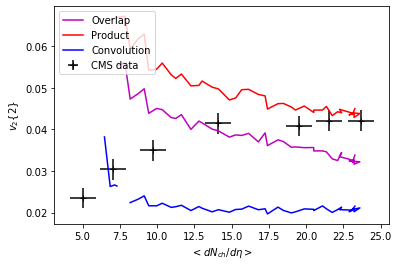

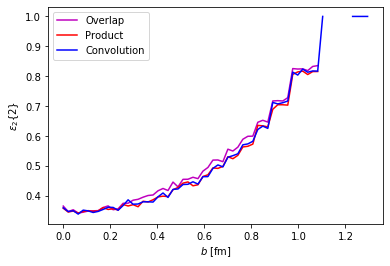

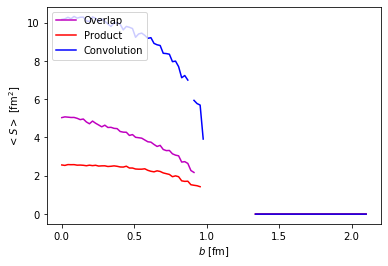

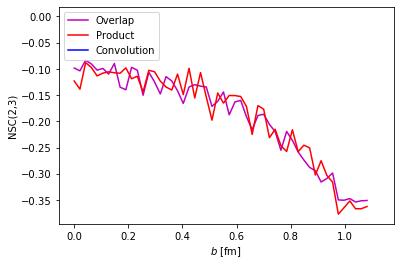

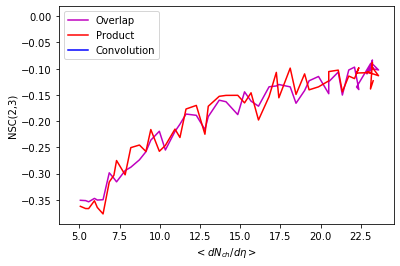

In [59]:
fig0=plt.figure(0)
plt.ylabel('$v_2\{2\}$')
plt.xlabel('$<dN_{ch}/d\eta>$')
plt.plot(dNlo, v2lo, 'm-', label = "Overlap")
plt.plot(dNlp, v2lp, 'r-', label = "Product")
plt.plot(dNlc, v2lc, 'b-', label = "Convolution")
plt.errorbar(xexp, yexp, xerr = 0.8858, yerr = 0.0025, fmt = 'k+', label = "CMS data")
plt.legend(loc='upper left')
fig0.savefig("mpidependv2.pdf", bbox_inches='tight')

fig1=plt.figure(1)
plt.ylabel('$\epsilon_2\{2\}$')
plt.xlabel('$b$ [fm]')
plt.plot(bl, eps2lo, 'm-', label = "Overlap")
plt.plot(bl, eps2lp, 'r-', label = "Product")
plt.plot(bl, eps2lc, 'b-', label = "Convolution")
plt.legend(loc='upper left')
fig1.savefig("mpidependeps.pdf", bbox_inches='tight')

fig2=plt.figure(2)
plt.ylabel('$<S>$ [fm$^2$]')
plt.xlabel('$b$ [fm]')
plt.plot(bl, Slo, 'm-', label = "Overlap")
plt.plot(bl, Slpwo, 'r-', label = "Product")
plt.plot(bl, Slc, 'b-', label = "Convolution")
plt.legend(loc='upper left')
fig2.savefig("mpidependss.pdf", bbox_inches='tight')

fig3=plt.figure(3)

plt.ylabel('NSC(2,3)')
plt.xlabel('$b$ [fm]')

plt.plot(bl, sc23lo, 'm-', label = "Overlap")
plt.plot(bl, sc23lp, 'r-', label = "Product")
plt.plot(bl, sc23lc, 'b-', label = "Convolution")
plt.legend(loc='upper left')

fig3=plt.figure(4)

plt.ylabel('NSC(2,3)')
plt.xlabel('$<dN_{ch}/d\eta>$')

plt.plot(dNlo, sc23lo, 'm-', label = "Overlap")
plt.plot(dNlp, sc23lp, 'r-', label = "Product")
plt.plot(dNlc, sc23lc, 'b-', label = "Convolution")
plt.legend(loc='upper left')



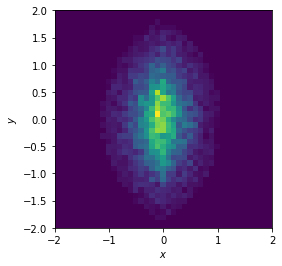

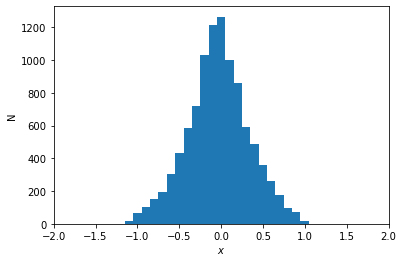

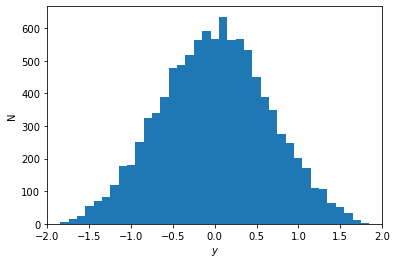

In [6]:
b1 = 2.8 * sigma1
histN = 10000
histxr = -2, 2
histyr = histxr

xl = np.linspace(xr[0], xr[1], xn)
yl = np.linspace(yr[0], yr[1], yn)

xyl = []

for x in xl:
    for y in yl:
        xyl.append((x, y))

p1l = [model(xyl[i][0], xyl[i][1], b1) for i in range(xn * yn)]

draw = random.choices(xyl, weights = p1l, k = histN)

drawx = [i[0] for i in draw]
drawy = [i[1] for i in draw]

x0 = mean(drawx)
y0 = mean(drawy)

drawx = [x - x0 for x in drawx]
drawy = [y - y0 for y in drawy]


t=plt.figure(4)
plt.hist2d(drawx, drawy, bins = [xn, yn], range = [xr, yr])
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xlim(histxr) 
plt.ylim(histyr) 
plt.gca().set_aspect('equal')

plt.figure(5)
plt.hist(drawx, bins = xn, range = xr)
plt.ylabel('N')
plt.xlabel('$x$')
plt.xlim(histxr) 

plt.figure(6)
plt.hist(drawy, bins = yn, range = yr)
plt.ylabel('N')
plt.xlabel('$y$')
plt.xlim(histyr) 

t.savefig("nompidepend.pdf", bbox_inches='tight')